In [1]:
import sys
sys.path.insert(0, "/home/afreiburger/env_packages/lib/python3.11/site-packages")

from os import system
import sys
# print(system("path"))
display(sys.path)

['/home/afreiburger/env_packages/lib/python3.11/site-packages',
 '/scratch/shared/code/MicrobiomeNotebooks/WesternDietMicrobiomes',
 '/usr/local/lib/python311.zip',
 '/usr/local/lib/python3.11',
 '/usr/local/lib/python3.11/lib-dynload',
 '',
 '/home/afreiburger/.local/lib/python3.11/site-packages',
 '/usr/local/lib/python3.11/site-packages']

# western diet media modeling

In [ ]:
from pandas import read_csv
biggDB = read_csv("BiGG_DB.txt", sep="\t")
biggIDName = dict(zip(biggDB["universal_bigg_id"].to_numpy(), biggDB["name"].to_numpy()))

## process the VHM WD media

In [1]:
import os
print(os.getcwd())

/scratch/shared/code/MicrobiomeNotebooks/WesternDietMicrobiomes


In [10]:
print(mapping["etoh"])

cpd00363


In [21]:
from pandas import read_csv
media = read_csv("VHM_highFat_lowFiber_media.tsv", sep="\t")
mediaFluxes = dict(zip(media["Reaction"].to_numpy(), media["Flux Value"].to_numpy()))
media.set_index("Reaction", inplace=True)
display(media)

exchangedCpds = [s.replace("[e]", "").replace("EX_", "") for s in media.index]

from json import load
mapping = load(open("../../CommScores/commscores/data/BiGG_to_MSID.json", 'r'))
names = []
missedCPDs = []
for m in exchangedCpds:
    # print(m)
    if m not in mapping:
        missedCPDs.append(m)
        names.append(m)
    else:   names.append(mapping[m])

media["ModelSEED ID"] = names
display(media)
    
print(len(missedCPDs), len(exchangedCpds), missedCPDs)

,Flux Value
Reaction,
EX_etoh[e],0.000000
EX_h2o[e],158601.920148
EX_caro[e],0.001620
EX_retinol[e],3.106982
EX_thm[e],1.808900
...,...
EX_lgnc[e],0.205669
EX_fol[e],0.000119
EX_strch1[e],0.068690


,Flux Value,ModelSEED ID
Reaction,,
EX_etoh[e],0.000000,cpd00363
EX_h2o[e],158601.920148,cpd00001
EX_caro[e],0.001620,cpd01420
EX_retinol[e],3.106982,cpd00365
EX_thm[e],1.808900,cpd00305
...,...,...
EX_lgnc[e],0.205669,cpd05235
EX_fol[e],0.000119,cpd00393
EX_strch1[e],0.068690,strch1


37 91 ['adpcbl', 'pnto_R', 'ascb_L', 'phyQ', 'mn2(e)', 'zn2(e)', 'mnl(e)', 'sbt_D', 'glc_D', 'cellul(e)', 'ala_L', 'arg_L', 'asp_L', 'cys_L', 'glu_L', 'his_L', 'ile_L', 'leu_L', 'lys_L', 'met_L', 'phe_L', 'pro_L', 'ser_L', 'thr_L', 'trp_L', 'tyr_L', 'val_L', 'lnlc', 'lnlnca', 'strdnc', 'CE2510', 'CE4843', 'docosac', 'doco13ac', 'crvnc', 'strch1', 'starch1200(e)']


In [5]:
missedNames = {}
for m in missedCPDs:
    if m in biggIDName:   missedNames[m] = biggIDName[m]
    elif m.replace("_", "__") in biggIDName:   missedNames[m] = biggIDName[m.replace("_", "__")]
    else:  print(m)

print()
display(missedNames)

adpcbl
phyQ
mn2(e)
zn2(e)
mnl(e)
cellul(e)
starch1200(e)



{'pnto_R': '(R)-Pantothenate',
 'ascb_L': 'L-Ascorbate',
 'sbt_D': 'D-Sorbitol',
 'glc_D': 'D-Glucose',
 'ala_L': 'L-Alanine',
 'arg_L': 'L-Arginine',
 'asp_L': 'L-Aspartate',
 'cys_L': 'L-Cysteine',
 'glu_L': 'L-Glutamate',
 'his_L': 'L-Histidine',
 'ile_L': 'L-Isoleucine',
 'leu_L': 'L-Leucine',
 'lys_L': 'L-Lysine',
 'met_L': 'L-Methionine',
 'phe_L': 'L-Phenylalanine',
 'pro_L': 'L-Proline',
 'ser_L': 'L-Serine',
 'thr_L': 'L-Threonine',
 'trp_L': 'L-Tryptophan',
 'tyr_L': 'L-Tyrosine',
 'val_L': 'L-Valine',
 'lnlc': 'Linoleic acid (all cis C18:2) n-6',
 'lnlnca': 'Alpha-Linolenic acid, C18:3, n-3',
 'strdnc': 'Stearidonic acid C18:4, n-3',
 'CE2510': '11-cis-eicosenoate',
 'CE4843': 'Cis,cis-11,14-eicosadienoyl-CoA',
 'docosac': 'Behenate, Docosanoate',
 'doco13ac': '13Z)-13-docosenoic acid',
 'crvnc': 'Cervonic acid, C22:6 n-3',
 'strch1': 'Starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})'}

### load the manually mapped 

In [25]:
from pandas import read_csv

media_mapping = read_csv("ModelSEED_Compound_Mapping.csv")
ids = list(missedNames.keys())+["adpcbl", "phyQ"]
media_mapping["IDs"] = [f"EX_{x}[e]" for x in ids]+["EX_mn2(e)", "EX_zn2(e)", "EX_mnl(e)", "EX_cellul(e)"]
media_mapping.set_index("IDs", inplace=True)
display(media_mapping)

,Compound Name,ModelSEED ID
IDs,,
EX_pnto_R[e],(R)-Pantothenate,cpd00644
EX_ascb_L[e],L-Ascorbate,cpd00059
EX_sbt_D[e],D-Sorbitol,cpd00588
EX_glc_D[e],D-Glucose,cpd00027
EX_ala_L[e],L-Alanine,cpd00035
EX_arg_L[e],L-Arginine,cpd00051
EX_asp_L[e],L-Aspartate,cpd00041
EX_cys_L[e],L-Cysteine,cpd00084
EX_glu_L[e],L-Glutamate,cpd00053


In [29]:
media.update(media_mapping)
# media.drop("EX_starch1200(e)", inplace=True)
display(media)
media.to_csv("MSID_media.csv")

print([x for x in media["ModelSEED ID"] if "cpd" not in x])

,Flux Value,ModelSEED ID
Reaction,,
EX_etoh[e],0.000000,cpd00363
EX_h2o[e],158601.920148,cpd00001
EX_caro[e],0.001620,cpd01420
EX_retinol[e],3.106982,cpd00365
EX_thm[e],1.808900,cpd00305
...,...,...
EX_hdcea[e],17.342837,cpd05274
EX_lgnc[e],0.205669,cpd05235
EX_fol[e],0.000119,cpd00393


[]


In [31]:
from json import dump

# wdMedia = dict(zip(list(media.index), list(media["ModelSEED ID"])))
# dump(wdMedia, open("WD_media.json", 'w'), indent=3)

wdMedia = dict(zip([f"EX_{x}_e0" for x in media["ModelSEED ID"]], list(media["Flux Value"])))
dump(wdMedia, open("WD_media.json", 'w'), indent=3)

## RC media

In [33]:
from pandas import read_csv
media = read_csv("highFiber.tsv", sep="\t")
mediaFluxes = dict(zip(media["Reaction"].to_numpy(), media["Flux Value"].to_numpy()))
media.set_index("Reaction", inplace=True)
display(media)

exchangedCpds = [s.replace("[e]", "").replace("EX_", "") for s in media.index]

from json import load
mapping = load(open("../../CommScores/commscores/data/BiGG_to_MSID.json", 'r'))
names = []
missedCPDs = []
for m in exchangedCpds:
    # print(m)
    if m not in mapping:
        missedCPDs.append(m)
        names.append(m)
    else:   names.append(mapping[m])

media["ModelSEED ID"] = names
display(media)
    
print(len(missedCPDs), len(exchangedCpds), missedCPDs)

,Flux Value
Reaction,
EX_etoh[e],22.792196
EX_h2o[e],181671.336776
EX_caro[e],0.013132
EX_retinol[e],1.099662
EX_thm[e],7.235601
...,...
EX_lgnc[e],0.166975
EX_fol[e],0.000273
EX_strch1[e],45.113962


,Flux Value,ModelSEED ID
Reaction,,
EX_etoh[e],22.792196,cpd00363
EX_h2o[e],181671.336776,cpd00001
EX_caro[e],0.013132,cpd01420
EX_retinol[e],1.099662,cpd00365
EX_thm[e],7.235601,cpd00305
...,...,...
EX_lgnc[e],0.166975,cpd05235
EX_fol[e],0.000273,cpd00393
EX_strch1[e],45.113962,strch1


37 91 ['adpcbl', 'pnto_R', 'ascb_L', 'phyQ', 'mn2(e)', 'zn2(e)', 'mnl(e)', 'cellul(e)', 'ala_L', 'arg_L', 'asp_L', 'cys_L', 'glu_L', 'his_L', 'ile_L', 'leu_L', 'lys_L', 'met_L', 'phe_L', 'pro_L', 'ser_L', 'thr_L', 'trp_L', 'tyr_L', 'val_L', 'lnlc', 'lnlnca', 'strdnc', 'CE2510', 'CE4843', 'docosac', 'doco13ac', 'crvnc', 'sbt_D', 'glc_D', 'strch1', 'starch1200(e)']


In [34]:
missedNames = {}
for m in missedCPDs:
    if m in biggIDName:   missedNames[m] = biggIDName[m]
    elif m.replace("_", "__") in biggIDName:   missedNames[m] = biggIDName[m.replace("_", "__")]
    else:  print(m)

print()
display(missedNames)

adpcbl
phyQ
mn2(e)
zn2(e)
mnl(e)
cellul(e)
starch1200(e)



{'pnto_R': '(R)-Pantothenate',
 'ascb_L': 'L-Ascorbate',
 'ala_L': 'L-Alanine',
 'arg_L': 'L-Arginine',
 'asp_L': 'L-Aspartate',
 'cys_L': 'L-Cysteine',
 'glu_L': 'L-Glutamate',
 'his_L': 'L-Histidine',
 'ile_L': 'L-Isoleucine',
 'leu_L': 'L-Leucine',
 'lys_L': 'L-Lysine',
 'met_L': 'L-Methionine',
 'phe_L': 'L-Phenylalanine',
 'pro_L': 'L-Proline',
 'ser_L': 'L-Serine',
 'thr_L': 'L-Threonine',
 'trp_L': 'L-Tryptophan',
 'tyr_L': 'L-Tyrosine',
 'val_L': 'L-Valine',
 'lnlc': 'Linoleic acid (all cis C18:2) n-6',
 'lnlnca': 'Alpha-Linolenic acid, C18:3, n-3',
 'strdnc': 'Stearidonic acid C18:4, n-3',
 'CE2510': '11-cis-eicosenoate',
 'CE4843': 'Cis,cis-11,14-eicosadienoyl-CoA',
 'docosac': 'Behenate, Docosanoate',
 'doco13ac': '13Z)-13-docosenoic acid',
 'crvnc': 'Cervonic acid, C22:6 n-3',
 'sbt_D': 'D-Sorbitol',
 'glc_D': 'D-Glucose',
 'strch1': 'Starch, structure 1 (1,6-{7[1,4-Glc], 4[1,4-Glc]})'}

In [36]:
from pandas import read_csv

media_mapping = read_csv("ModelSEED_Compound_Mapping.csv")
ids = list(missedNames.keys())+["adpcbl", "phyQ"]
media_mapping["IDs"] = [f"EX_{x}[e]" for x in ids]+["EX_mn2(e)", "EX_zn2(e)", "EX_mnl(e)", "EX_cellul(e)"]
media_mapping.set_index("IDs", inplace=True)
display(media_mapping)

media.update(media_mapping)
# media.drop("EX_starch1200(e)", inplace=True)
display(media)
media.to_csv("MSID_fiber_media.csv")

print([x for x in media["ModelSEED ID"] if "cpd" not in x])

,Compound Name,ModelSEED ID
IDs,,
EX_pnto_R[e],(R)-Pantothenate,cpd00644
EX_ascb_L[e],L-Ascorbate,cpd00059
EX_ala_L[e],D-Sorbitol,cpd00588
EX_arg_L[e],D-Glucose,cpd00027
EX_asp_L[e],L-Alanine,cpd00035
EX_cys_L[e],L-Arginine,cpd00051
EX_glu_L[e],L-Aspartate,cpd00041
EX_his_L[e],L-Cysteine,cpd00084
EX_ile_L[e],L-Glutamate,cpd00053


,Flux Value,ModelSEED ID
Reaction,,
EX_etoh[e],22.792196,cpd00363
EX_h2o[e],181671.336776,cpd00001
EX_caro[e],0.013132,cpd01420
EX_retinol[e],1.099662,cpd00365
EX_thm[e],7.235601,cpd00305
...,...,...
EX_hdcea[e],3.616985,cpd05274
EX_lgnc[e],0.166975,cpd05235
EX_fol[e],0.000273,cpd00393


[]


In [37]:
from json import dump
wdMedia = dict(zip([f"EX_{x}_e0" for x in media["ModelSEED ID"]], list(media["Flux Value"])))
dump(wdMedia, open("RC_media.json", 'w'), indent=3)

# Community flux processing

## Oxygen fluxes chart

In [171]:
from pandas import read_csv

fluxes = read_csv("CommunityFluxSolution2.csv").drop("Unnamed: 0", axis=1).set_index("id")
fluxes.columns = [x.split("_")[-1] for x in fluxes.columns]
fluxes
# rxns = fluxes["id"]
# print([x for x in rxns if "EX_" in x])

,-1.5,1.5,4.0,6.0,9.0,12.5
id,,,,,,
max_growth,8.445032,8.445008,8.445007,8.445028,8.443695,8.440343
carbon_uptake,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
flux fitting objective,NaN,NaN,NaN,NaN,NaN,NaN
minimum probability objective,1132.197592,1144.176486,1017.927115,998.516143,859.482377,1102.144781
rxn02201_c1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
SK_cpd01042_c19,NaN,NaN,NaN,NaN,NaN,0.000000
SK_cpd02701_c19,NaN,NaN,NaN,NaN,NaN,0.000000
SK_cpd03091_c19,NaN,NaN,NaN,NaN,NaN,0.000000


In [173]:
from pandas import set_option
set_option("display.max_rows", None)
fluxes[fluxes.index.str.contains("EX_")]

,-1.5,1.5,4.0,6.0,9.0,12.5
id,,,,,,
EX_cpd01080_e0,0.000000e+00,-4.252850e-02,0.000000e+00,-0.000000,0.000000e+00,0.000000e+00
EX_cpd00307_e0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
EX_cpd10515_e0,-9.225932e-02,-7.174680e-02,-8.644858e-02,-0.096450,-8.595841e-02,-8.253473e-02
EX_cpd00084_e0,-1.664072e+00,7.307791e-02,-1.799667e-01,0.332965,4.500253e-01,2.791405e-01
EX_cpd00011_e0,4.783545e-02,6.678511e-03,4.540623e-01,2.484064,7.111290e-02,2.375419e-01
EX_cpd00119_e0,-5.558634e+00,-1.598850e+01,-3.076093e+00,-3.081016,-2.963478e+00,-3.017276e+00
EX_cpd01048_e0,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000,-0.000000e+00,-0.000000e+00
EX_cpd00244_e0,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000,-0.000000e+00,0.000000e+00
EX_cpd01012_e0,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000,-0.000000e+00,0.000000e+00


In [52]:
RCo2 = fluxes[fluxes.index == "EX_cpd00007_e0"]
RCo2

,-1.5,1.5,4.0,6.0,9.0,12.5
id,,,,,,
EX_cpd00007_e0,-20.0,-20.0,-10.593463,-13.530593,-17.179433,-7.160259


### species-level oxygen consumption

In [5]:
from pandas import read_csv

In [78]:
RCfluxes = read_csv("CommunityFluxSolution2.csv").drop("Unnamed: 0", axis=1).set_index("id")
RCfluxes.columns = ["RC_"+x.split("_")[-1] for x in fluxes.columns]
WDfluxes = read_csv("CommunityFluxSolution3.csv").drop("Unnamed: 0", axis=1).set_index("id")
WDfluxes.columns = ["WD_"+x.split("_")[-1] for x in fluxes.columns]

In [375]:
from pandas import concat
fluxes = concat([WDfluxes, RCfluxes], axis=1, join="outer")
fluxes.to_csv("total_community_solutions.csv")
print()
o2rxns = fluxes.loc["EX_cpd00007_e0"]
# display(total_fluxes)
display(o2rxns)

WD_-1.5   -20.000000
WD_1.5    -20.000000
WD_4.0    -20.000000
WD_6.0    -20.000000
WD_9.0    -20.000000
WD_12.5   -20.000000
RC_-1.5   -20.000000
RC_1.5    -20.000000
RC_4.0    -10.593463
RC_6.0    -13.530593
RC_9.0    -17.179433
RC_12.5    -7.160259
Name: EX_cpd00007_e0, dtype: float64

In [88]:
from pandas import DataFrame
o2rxns_2 = DataFrame()
o2rxnIDs = [rxn.id for rxn in msdb.compound_tokens.cpd00007_0.reactions]
rows = []
for index, row in total_fluxes.iterrows():
    rxnName = index.split("_")[0]
    if rxnName in o2rxnIDs:
        o2rxns_2[index] = row

/tmp/ipykernel_639261/2394615619.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  o2rxns_2[index] = row
/tmp/ipykernel_639261/2394615619.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  o2rxns_2[index] = row
/tmp/ipykernel_639261/2394615619.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  o2

In [409]:
total_fluxes = abs(fluxes.copy())
total_fluxes.drop(["max_growth", "carbon_uptake", "flux fitting objective", "minimum probability objective"], inplace=True)
total_fluxes.drop([r for r in total_fluxes.index if any([x in r for x in ["bio", "SK_"]])], inplace=True)
bulk_total_fluxes = total_fluxes.sum()
display(bulk_total_fluxes)

WD_-1.5    3549.836810
WD_1.5     3668.331318
WD_4.0     2770.230005
WD_6.0     3959.916838
WD_9.0     2737.455532
WD_12.5    3207.882147
RC_-1.5    3068.424910
RC_1.5     2952.177867
RC_4.0     2467.799266
RC_6.0     2456.523448
RC_9.0     2871.126979
RC_12.5    3311.381124
dtype: float64

In [403]:
total_member_fluxes = abs(fluxes.copy())
total_member_fluxes.drop(["max_growth", "carbon_uptake", "flux fitting objective", "minimum probability objective"], inplace=True)
total_member_fluxes.index = [i.split("_")[-1].replace("c", '') for i in total_member_fluxes.index]
total_member_fluxes.index.name = "compartment"
total_member_fluxes = total_member_fluxes.groupby("compartment", axis=0).sum()
total_member_fluxes

/tmp/ipykernel_639261/4086895643.py:5: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  total_member_fluxes = total_member_fluxes.groupby("compartment", axis=0).sum()


,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5
compartment,,,,,,,,,,,,
0,4.222509,3.340174,3.290012,3.538765,4.222537,4.222520,4.222516,4.222504,4.222503,4.222514,4.221847,4.220171
1,1885.600152,2468.344188,2467.509357,2521.833577,947.005622,684.796585,164.246580,421.100291,898.609424,979.978451,174.182097,80.079586
10,38.122503,0.000000,0.000000,0.000000,0.000000,0.000000,64.566205,141.533869,0.000000,54.347789,95.591357,164.866781
11,45.406515,0.000000,0.000000,0.000000,0.000000,0.000000,55.150231,39.603878,0.000000,0.000000,70.205231,162.939573
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.023210,191.324543,0.000000,0.000000,157.253891,76.205469
13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.758065,39.486249,0.000000,0.000000,58.541619,158.622922
14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,215.939378,160.745636,0.000000,0.000000,52.284625,139.850415
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.647689,41.090690,0.000000,0.000000,55.483885,204.138282
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.817918,33.891696


In [404]:
o2transports = total_fluxes[total_fluxes.index.str.contains("rxn05468")]
o2transports.index = [i.split("_")[-1].replace("c", '') for i in o2transports.index]
display(o2transports)
boolO2transports = o2transports > .2
display(boolO2transports)

,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5
1,14.189443,19.017363,20.0,18.594821,14.110914,1.163390,0.001457,1.714954,3.047604,9.139672,6.544653,0.000000
2,0.000000,0.982637,NaN,1.405179,0.813511,0.003268,0.006373,0.699849,0.219095,0.125133,0.006910,0.570619
3,0.000000,NaN,NaN,NaN,1.850269,11.508975,8.276265,0.000000,0.343360,0.005104,0.002387,0.017184
4,1.038182,NaN,NaN,NaN,0.302462,5.935356,0.000000,6.523825,0.097169,0.001563,0.000565,0.000940
5,0.000000,NaN,NaN,NaN,0.026443,0.000000,0.000844,4.796754,0.092436,0.024075,0.005028,5.245309
6,1.478220,NaN,NaN,NaN,2.128802,1.389010,0.002653,0.000000,5.135631,0.000277,0.046185,0.000363
7,0.002177,NaN,NaN,NaN,0.767599,NaN,2.835029,0.000000,1.518506,0.003530,9.445265,0.001947
8,2.372438,NaN,NaN,NaN,NaN,NaN,1.186267,0.158595,0.139193,0.000906,0.074564,1.243864
9,0.917889,NaN,NaN,NaN,NaN,NaN,5.294256,0.368108,0.000468,4.230158,0.003328,0.001242
10,0.000845,NaN,NaN,NaN,NaN,NaN,0.069845,2.731175,NaN,0.000174,0.980986,0.000528


,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5
1,True,True,True,True,True,True,False,True,True,True,True,False
2,False,True,False,True,True,False,False,True,True,False,False,True
3,False,False,False,False,True,True,True,False,True,False,False,False
4,True,False,False,False,True,True,False,True,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False,True
6,True,False,False,False,True,True,False,False,True,False,False,False
7,False,False,False,False,True,False,True,False,True,False,True,False
8,True,False,False,False,False,False,True,False,False,False,False,True
9,True,False,False,False,False,False,True,True,False,True,False,False
10,False,False,False,False,False,False,False,True,False,False,True,False


In [405]:
total_o2_consumer_fluxes = total_member_fluxes[boolO2transports].sum()
total_o2_consumer_fluxes

WD_-1.5    2142.055579
WD_1.5     3261.019196
WD_4.0     2467.509357
WD_6.0     3589.007261
WD_9.0     2412.880436
WD_12.5    2367.023343
RC_-1.5     773.440412
RC_1.5     1649.006491
RC_4.0     1645.281416
RC_6.0     1121.229371
RC_9.0      621.209894
RC_12.5     689.760607
dtype: float64

In [107]:
bulk_total_flux[bulk_total_flux < 0]

Series([], dtype: float64)

In [362]:
from pandas import read_csv
from json import load

asv_setNames = load(open("asvset_names.json", 'r'))
asv_sets = load(open("asv_asvset.json", 'r'))

# taxonomy = read_csv("wd_taxonomy.csv").set_index("Feature ID")
# taxonomy_dic = taxonomy.T.to_dict()
abundances = read_csv("mean_abund_perDay_perTreatment_100.csv").set_index("Unnamed: 0")
newIndex, missedHashes = [], []
for m in abundances.index:
    if m not in asv_sets:   missedHashes.append(m)  ;  newIndex.append(m)
    else:  newIndex.append(asv_setNames[asv_sets[m]])
abundances.index = newIndex
print(len(missedHashes), missedHashes)
definedAbundances = abundances[abundances.index.str.contains("\.")]
definedAbundances.columns = [col.replace("-ABX", "") for col in definedAbundances.columns]
print(definedAbundances.columns)
# display(definedAbundances)

## average between adjacent diet+day points for comparison with the predicted values
RCintervals = [["RC_-3", "RC_0"], ["RC_0", "RC_3"], ["RC_3", "RC_5"], ["RC_5", "RC_7"], ["RC_8", "RC_11"], ["RC_11", "RC_13"]]
WDintervals = [["WD_-3", "WD_0"], ["WD_0", "WD_3"], ["WD_3", "WD_5"], ["WD_5", "WD_7"], ["WD_8", "WD_11"], ["WD_11", "WD_13"]]
newCols = []
for cols in RCintervals:
    day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
    aveDay = (int(day1)+int(day2))/2
    definedAbundances[f"RC_{aveDay}"] = (definedAbundances[cols[0]] + definedAbundances[cols[1]])/2
    newCols.append(f"RC_{aveDay}")

for cols in WDintervals:
    day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
    aveDay = (int(day1)+int(day2))/2
    definedAbundances[f"WD_{aveDay}"] = (definedAbundances[cols[0]] + definedAbundances[cols[1]])/2
    newCols.append(f"WD_{aveDay}")

definedAbundances.drop([col for col in definedAbundances.columns if col not in newCols], axis=1, inplace=True)
# definedAbundances.drop(["RC_1", "RC_2", "RC_4",], axis=1, inplace=True)

from collections import Counter
print()
print(Counter(definedAbundances.index))
definedAbundances.index.name = "member"
print()
definedAbundances = definedAbundances.groupby(by="member").sum()
print(Counter(definedAbundances.index))
abundances_dic = definedAbundances.T.to_dict()
display(definedAbundances)

22 ['efccbf9af6f53b95d750539be7153a8c', '77ed2d3561c74db8078363fa2496e5c7', '9cf5cb71450a2aa080ff905f89b0a624', 'f74112b56922a99ef89d2cef314854ec', '514e31acd7be571b6d4210099e6dbbf6', '83a4aa4f6ec422145d5f32d8c92363cb', '33a7487cf2e9ba2883f7de82fa0e83ce', 'f13aade0a534cc6ecebc973a4ea5cf7c', '46289e2c7768d63cf3403101a2cd0ce7', '532b1ddadb35f4749e3fda0fdc5cf011', '43e6cf1a618b7effe128690f78ceaaf7', '405f1bbf55c2b8bb861d63d6764a34bb', 'a78e2d94057a51aa4748ef151537d100', '87e1dade449ce7357886fc2a92e2e911', 'a94377659b9c7b34146442586474fb23', 'e117df89368424df0ad58a4fb9543db6', 'af1f95d4540789601ec0460425804d26', 'cc4eb8e929d4eab5b524bbd36739d201', '2e57e1a87de1f5a5888c099a41c2a671', 'e7d8c6c485130e4f986455a508b97c02', '2e13210e10ffc3cf1c56c0f735d38ab5', '641632bf34688ce998689b8ced776227']
Index(['RC_-13', 'RC_-3', 'RC_0', 'RC_1', 'RC_11', 'RC_13', 'RC_2', 'RC_3',
       'RC_4', 'RC_5', 'RC_6', 'RC_7', 'RC_8', 'WD_-13', 'WD_-3', 'WD_0',
       'WD_1', 'WD_11', 'WD_13', 'WD_2', 'WD_3', 'WD_4

/tmp/ipykernel_639261/3207736462.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  definedAbundances[f"RC_{aveDay}"] = (definedAbundances[cols[0]] + definedAbundances[cols[1]])/2
/tmp/ipykernel_639261/3207736462.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  definedAbundances[f"RC_{aveDay}"] = (definedAbundances[cols[0]] + definedAbundances[cols[1]])/2
/tmp/ipykernel_639261/3207736462.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.5,RC_12.0,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.5,WD_12.0
member,,,,,,,,,,,,
Acetivibrio.1,0.002126,0.000147,0.000000,0.000344,0.012348,0.029159,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000
Acinetobacter.1,0.000000,0.042130,0.042237,0.000122,0.000003,0.000000,0.000000,0.000203,0.000302,0.048108,0.182176,0.117081
Agrobacterium.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007963,0.022578,0.014968
Akkermansia.1,0.001558,0.000988,0.000665,0.030194,0.053265,0.027813,0.018419,0.000004,0.000004,0.000169,0.000037,0.000000
Alistipes.1,0.002978,0.000075,0.000000,0.000000,0.000051,0.000051,0.000685,0.000000,0.000000,0.000000,0.000000,0.000000
Alistipes.2,0.000005,0.000000,0.000000,0.012622,0.027038,0.026924,0.000091,0.000000,0.000000,0.000003,0.000000,0.000000
Alistipes.4,0.000009,0.000000,0.000000,0.003803,0.007018,0.001511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alloiococcus.1,0.016804,0.018553,0.001896,0.000143,0.000000,0.000029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacillus.4,0.010255,0.010349,0.000104,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [170]:
abundances_dic

{'Acetivibrio.1': {'RC_-1.5': 0.00212629547097735,
  'RC_1.5': 0.0001471861048493,
  'RC_4.0': 0.0,
  'RC_6.0': 0.0003444998812069,
  'RC_9.5': 0.0123482027117972,
  'RC_12.0': 0.0291590039939926,
  'WD_-1.5': 5.63616075169e-05,
  'WD_1.5': 0.0,
  'WD_4.0': 0.0,
  'WD_6.0': 0.0,
  'WD_9.5': 0.0,
  'WD_12.0': 0.0},
 'Acinetobacter.1': {'RC_-1.5': 0.0,
  'RC_1.5': 0.0421298772231262,
  'RC_4.0': 0.04223711827175045,
  'RC_6.0': 0.0001218103126193136,
  'RC_9.5': 2.77860106698281e-06,
  'RC_12.0': 0.0,
  'WD_-1.5': 0.0,
  'WD_1.5': 0.0002025712399364,
  'WD_4.0': 0.00030163774548165,
  'WD_6.0': 0.04810822334494361,
  'WD_9.5': 0.18217579887844695,
  'WD_12.0': 0.11708108465790354},
 'Agrobacterium.1': {'RC_-1.5': 0.0,
  'RC_1.5': 0.0,
  'RC_4.0': 0.0,
  'RC_6.0': 0.0,
  'RC_9.5': 0.0,
  'RC_12.0': 0.0,
  'WD_-1.5': 0.0,
  'WD_1.5': 0.0,
  'WD_4.0': 0.0,
  'WD_6.0': 0.0079632785443351,
  'WD_9.5': 0.0225783126022591,
  'WD_12.0': 0.01496771009315585},
 'Akkermansia.1': {'RC_-1.5': 0.00155

In [182]:
o2rxns_2.columns = [col.split("_")[-1].replace("c", '') for col in o2rxns_2.columns]
o2rxns_2 = o2rxns_2.groupby(level=0, axis=1).sum()
display(o2rxns_2)

/tmp/ipykernel_639261/1606497399.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  o2rxns_2 = o2rxns_2.groupby(level=0, axis=1).sum()


,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
WD_-1.5,40.034823,0.001691,0.001611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.114481,0.000000,4.434659,0.005806,7.117314,2.753666
WD_1.5,56.057468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.965273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WD_4.0,55.652671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WD_6.0,55.694982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.812641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WD_9.0,42.332743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627021,3.700538,0.604291,0.054648,6.386406,2.302727,0.000000,0.000000
WD_12.5,2.329818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006536,34.515777,17.803428,-1.736176,4.166927,0.000000,0.000000,0.000000
RC_-1.5,0.002914,0.207284,0.000978,1.251245,2.002540,14.050776,3.723531,0.000000,0.000000,0.000000,0.000000,0.012745,24.816902,11.166650,0.001687,0.005305,8.504206,3.557759,15.880246
RC_1.5,3.429908,8.193525,0.003768,14.283881,2.768621,6.245000,0.000000,0.000000,0.000000,0.000000,0.000000,1.399699,0.000000,19.569363,21.098231,0.000000,-1.911598,0.317189,1.104324
RC_4.0,9.115591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.438191,0.688581,0.290456,0.184873,15.273494,3.038798,0.279109,0.001122
RC_6.0,25.180859,0.000348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251529,0.010208,0.003126,0.048844,0.000555,0.007943,0.002355,12.186454


In [342]:
from json import load

community_model_data = load(open("community_model_data.json", 'r'))
# display(community_model_data)

new_comData = {}
df_dict = {}
for day_date, content in community_model_data.items():
    day_date = day_date.replace("-ABX", '')
    df_dict[day_date] = {}
    new_comData[day_date] = {}
    for index, name in enumerate(content["names"]):
        new_comData[day_date][str(index+1)] = {"name": name, "abundance": content["abundances"][name]}
        df_dict[day_date][str(index+1)] = content["abundances"][name]
        
# display(new_comData)
display(df_dict)

{'RC_-1.5': {'1': 0.04843895548529505,
  '2': 0.21186061018309485,
  '3': 0.08786203695767955,
  '4': 0.1264915649541215,
  '5': 0.028043883563881544,
  '6': 0.08819119567468148,
  '7': 0.08117072035313463,
  '8': 0.03467786614577383,
  '9': 0.08385539204093137,
  '10': 0.024959315539621465,
  '11': 0.016264689349344427,
  '12': 0.011508571646387479,
  '13': 0.0117252922299623,
  '14': 0.06368399216670433,
  '15': 0.015231733328271546},
 'RC_1.5': {'1': 0.20348989421771158,
  '2': 0.08474639367504053,
  '3': 0.1309746907186885,
  '4': 0.07327134180519605,
  '5': 0.13183227286093865,
  '6': 0.011185657316570624,
  '7': 0.04320292168200713,
  '8': 0.08321287177640227,
  '9': 0.013824145944972874,
  '10': 0.04353588773310435,
  '11': 0.021774696128366383,
  '12': 0.058851523898559285,
  '13': 0.0121459895596003,
  '14': 0.049445436875540864,
  '15': 0.01263951643347127},
 'RC_4.0': {'1': 0.5223255953271383,
  '2': 0.029688565965290306,
  '3': 0.12685395161587878,
  '4': 0.0458474142707168

In [188]:
from pandas import DataFrame
df = DataFrame(df_dict)
df.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RC_-1.5,0.048439,0.211861,0.087862,0.126492,0.028044,0.088191,0.081171,0.034678,0.083855,0.024959,0.016265,0.011509,0.011725,0.063684,0.015232,NaN,NaN,NaN,NaN
RC_1.5,0.203490,0.084746,0.130975,0.073271,0.131832,0.011186,0.043203,0.083213,0.013824,0.043536,0.021775,0.058852,0.012146,0.049445,0.012640,NaN,NaN,NaN,NaN
RC_4.0,0.522326,0.029689,0.126854,0.045847,0.124910,0.029935,0.040567,0.024672,0.012753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RC_6.0,0.547970,0.016939,0.171295,0.014990,0.023314,0.038705,0.059241,0.012159,0.042053,0.016180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RC_9.0,0.102490,0.154546,0.022876,0.012639,0.112447,0.081845,0.104583,0.092191,0.063788,0.028447,0.021300,0.046797,0.021372,0.015559,0.024142,0.012147,0.012126,0.012981,NaN
RC_12.5,0.024459,0.118718,0.154957,0.064747,0.053553,0.052017,0.089387,0.038403,0.017105,0.050355,0.054535,0.023276,0.053492,0.042715,0.062350,0.010352,0.023710,0.013360,0.019238
WD_-1.5,0.572458,0.017866,0.194700,0.018558,0.021918,0.025256,0.049653,0.019735,0.015559,0.011569,0.013779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WD_1.5,0.977118,0.014562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WD_4.0,0.991019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WD_6.0,0.930318,0.048784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
weighted_fluxes = df.T.multiply(o2rxns_2)
# total_o2_metabolism = weighted_fluxes.T.sum()/bulk_total_fluxes
total_o2_metabolism = total_o2_consumer_fluxes/bulk_total_fluxes
# total_o2_metabolism = -o2rxns/bulk_total_fluxes
newDict = {}
for label, percent in total_o2_metabolism.items():
    diet, day = label.split("_")
    newDict[diet] = newDict.get(diet, {})
    newDict[diet][day] = percent
newDict

newDF = DataFrame(newDict)
newDF

,WD,RC
-1.5,0.603424,0.252064
1.5,0.888965,0.558573
4.0,0.890724,0.666700
6.0,0.906334,0.456429
9.0,0.881432,0.216364
12.5,0.737877,0.208300


[ 0  2  4  6  8 10]
2


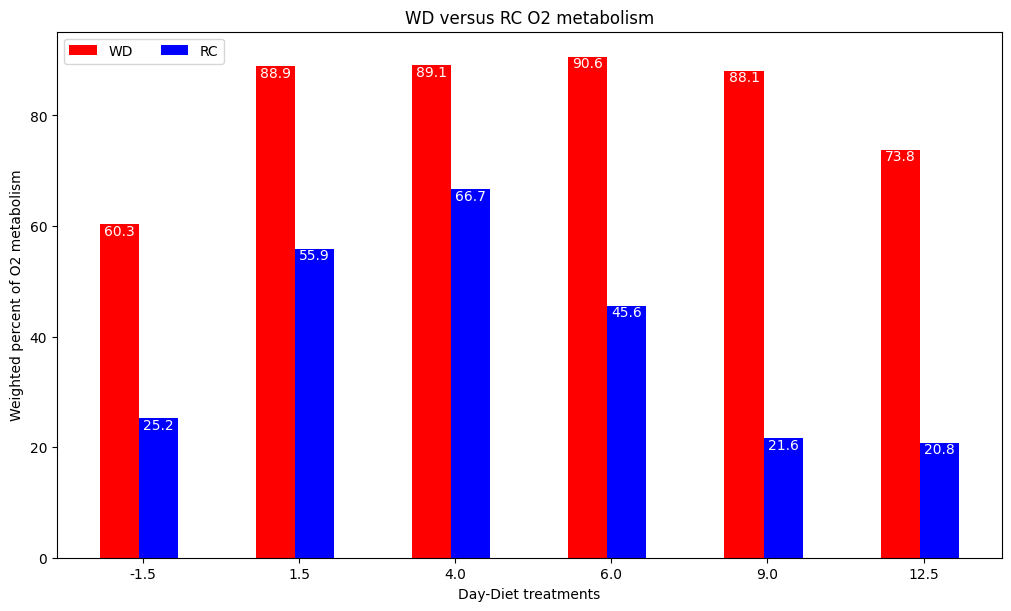

In [407]:
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot
from numpy import arange
from os import getcwd

# Plotting the diverging bar chart
def layeredBarChart(averages, errors=None, baseDir=None):
    baseDir = baseDir or getcwd()
    
    fig, ax = pyplot.subplots(figsize=(10, 6))
    wd_label, rc_label = False, False
    for label, abundance in averages.items():
        # error = errors[day][diet]
        if diet == "WD":
            color = "black"
            bars = ax.bar([day], [abundance], color="blue", label=diet if not wd_label else "",
                          # yerr=error,
                          bottom=[abundance])
            wd_label = True
        else:
            color = "white"
            bars = ax.bar([day], [abundance], color='red', label=diet if not rc_label else "",
                          # yerr=error,
                          bottom=[0])
            rc_label = True
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width()/1.2, abundance, '%.1f' %(abundance), ha='center', va='bottom', fontsize=10, color=color)
    ax.set_xlabel('days')
    ax.set_ylabel('ave. number of consumption+production per ASV')
    ax.set_title("Average metabolic connectivity")
    ax.legend()
    fig.savefig(baseDir+f"/O2fluxes.png")

    
def BarChart(df, width=.5, baseDir=None):
    ## simple carbs
    baseDir = baseDir or getcwd()
    fig, ax = pyplot.subplots(figsize=(10, 6), layout='constrained')
    colors = {"WD": "red", "RC": "blue"}
    barss = []
    numCols = len(df.index)
    padding = 1
    xs = arange(numCols) * (1 + padding)
    print(xs)
    for i, (row_label, row_data) in enumerate(df.T.iterrows()):
        bars = ax.bar(xs+width*i, round(row_data*100, 1), width, label=row_label, color=colors.get(row_label, 'gray'))
        # print(i, row_label, row_data)
        # bars = ax.bar(xs[i] + width*i, round(row_data*100, 1))
        barss.append(bars)
        # break
    # return
    print(len(barss))
    ### Add text labels above each bar
    for bars in barss:
        for bar in bars:
            val = bar.get_height()
            if val == 0:   continue
            location = "top" if val > 0 else "bottom"
            ax.text(bar.get_x() + bar.get_width()/2, val, f'{abs(val)}', ha='center', va=location, fontsize=10, color='white')
                
                
    ### curtail the figure
    categories = list(df.index)
    ax.set_xticks(xs + width*numCols/10)  # Center the tick labels
    ax.set_xticklabels(categories)
    ax.legend(loc='upper left', ncols=3)
    ax.set_xlabel('Day-Diet treatments')
    ax.set_ylabel('Weighted percent of O2 metabolism')
    ax.set_title(f"WD versus RC O2 metabolism")
    
    fig.savefig(baseDir+f"/O2_barChart.png")
    
BarChart(newDF)
# layeredBarChart(total_o2_metabolism)

In [98]:
fluxes = read_csv("ASVFluxes2.csv").set_index("id")
# display(fluxes)
oxygenRXNs = fluxes[fluxes["equation"].str.contains("cpd00007")]
bulk_total_asvfluxes = fluxes.drop(["equation", "name"], axis=1).sum()
oxygenRXNs

,equation,name,Lactobacillus.3_RC_-1.5,Lactobacillus.3_RC_1.5,Lactobacillus.3_RC_4,Lactobacillus.3_RC_6,Lactobacillus.3_RC_9,Lactobacillus.3_RC_12.5,Lactobacillus.3_WD_-1.5,Lactobacillus.3_WD_9,...,Merdibacter.1_RC_4,Merdibacter.1_RC_9,Merdibacter.1_RC_12.5,Merdibacter.1_WD_-1.5,Merdibacter.1_WD_1.5,Enterococcus.3_RC_1.5,Enterococcus.3_RC_4,Enterococcus.3_RC_6,Enterococcus.3_RC_9,Oscillibacter.3_RC_12.5
id,,,,,,,,,,,,,,,,,,,,,
rxn00262,rxn00262_c1: cpd00001_c1 + cpd00007_c1 + cpd00...,L-Aspartic acid:oxygen oxidoreductase (deamina...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rxn00152,rxn00152_c1: cpd00007_c1 + cpd00009_c1 + cpd00...,Pyruvate:oxygen 2-oxidoreductase (phosphorylat...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
rxn00208,rxn00208_c1: cpd00001_c1 + cpd00007_c1 + cpd00...,Pyridoxamine-5'-phosphate:oxygen oxidoreductas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
rxn00614,rxn00614_c1: cpd00007_c1 + cpd00080_c1 --> cpd...,sn-Glycerol-3-phosphate:oxygen 2-oxidoreductas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
rxn00264,rxn00264_c1: cpd00007_c1 + cpd00130_c1 --> cpd...,(S)-Malate:oxygen oxidoreductase [c0],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rxn00058,rxn00058_c19: cpd00007_c19 + 4 cpd00067_c19 + ...,Ferrocytochrome-c:oxygen oxidoreductase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rxn01350,rxn01350_c7: cpd00001_c7 + cpd00007_c7 + cpd00...,Methanethiol:oxygen oxidoreductase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rxn01778,rxn01778_c11: cpd00001_c11 + cpd00007_c11 + cp...,D-Ornithine:oxygen oxidoreductase (deaminating),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
bulk_total_asvfluxes[bulk_total_asvfluxes < 0]

Lactobacillus.1_RC_-1.5     -149.642380
Lactobacillus.1_RC_1.5      -111.491040
Lactobacillus.1_RC_4         -22.337367
Lactobacillus.1_RC_6        -150.636891
Lactobacillus.1_RC_9         -49.362052
Lactobacillus.1_RC_12.5     -162.685804
Alloiococcus.1_RC_-1.5       -35.995850
Alloiococcus.1_RC_1.5        -23.990237
Staphylococcus.4_RC_-1.5    -125.578443
Enterococcus.2_RC_1.5        -80.315787
Enterococcus.2_RC_4          -29.116497
Enterococcus.2_RC_6          -17.297113
Enterococcus.2_RC_9           -1.924180
Enterococcus.2_WD_9          -81.275822
Acinetobacter.1_RC_1.5       -57.238959
Alistipes.2_RC_6             -89.101539
Alistipes.2_RC_9             -66.637905
Alistipes.2_RC_12.5          -38.255245
Bifidobacterium.1_RC_9        -8.650068
Ruminococcus.3_RC_9         -116.129912
Ruminococcus.3_WD_-1.5       -28.807380
Acetivibrio.1_RC_9           -82.776188
Acetivibrio.1_RC_12.5        -79.374340
Eubacterium.7_RC_9          -138.721373
Eubacterium.7_RC_12.5        -99.750354


In [59]:
from modelseedpy.biochem import from_local

msdb = from_local("../../ModelSEEDDatabase")

In [335]:
o2consuming, o2producing = [], []
for rxnID in oxygenRXNs.index:
    rxn = msdb.reactions.get_by_id(rxnID)
    if "cpd00007_0" in [m.id for m in rxn.reactants]:
        o2consuming.append(rxnID)
    elif "cpd00007_0" in [m.id for m in rxn.products]:   o2producing.append(rxnID)
    
o2consumingFluxes = oxygenRXNs.loc[o2consuming]
o2producingFluxes = oxygenRXNs.loc[o2producing]

In [352]:
total_o2consumption = o2consumingFluxes.sum().drop(["equation", "name"])
total_o2production = o2producingFluxes.sum().drop(["equation", "name"])
# total_o2production
net_o2consumption = (total_o2consumption-total_o2production)#/bulk_total_asvfluxes

In [353]:
net_o2consumption

Lactobacillus.3_RC_-1.5            0.0
Lactobacillus.3_RC_1.5             0.0
Lactobacillus.3_RC_4          1.369464
Lactobacillus.3_RC_6          2.982747
Lactobacillus.3_RC_9         15.104084
Lactobacillus.3_RC_12.5            0.0
Lactobacillus.3_WD_-1.5            0.0
Lactobacillus.3_WD_9               0.0
Lactobacillus.3_WD_12.5            0.0
Nosocomiicoccus.1_RC_-1.5    22.276006
Nosocomiicoccus.1_RC_1.5      21.07936
Staphylococcus.3_RC_-1.5     20.906919
Staphylococcus.3_RC_1.5      20.667329
Staphylococcus.3_RC_4        39.574693
Turicibacter.1_RC_-1.5             0.0
Turicibacter.1_RC_1.5              0.0
Turicibacter.1_RC_6               -0.0
Turicibacter.1_RC_9               -0.0
Turicibacter.1_RC_12.5            -0.0
Lactobacillus.1_RC_-1.5            0.0
Lactobacillus.1_RC_1.5            -0.0
Lactobacillus.1_RC_4          0.006948
Lactobacillus.1_RC_6          0.007056
Lactobacillus.1_RC_9           0.00353
Lactobacillus.1_RC_12.5       0.003441
Muribaculum.1_RC_-1.5    

In [359]:
tracking = {"-1.5_RC":{}, "-1.5_WD":{}, "1.5_RC": {}, "1.5_WD":{}, "4_RC": {}, "4_WD": {},
            "6_RC":{}, "6_WD":{}, "9_RC": {}, "9_WD":{}, "12.5_RC": {}, "12.5_WD": {}}

for source, flux in net_o2consumption.items():
    member, diet, day = source.split("_")
    tracking[day+"_"+diet][member] = flux
    
# for day, content in tracking.items():
#     for diet, content2 in content.items():
        # print(day, diet, sum(list(content2.values())))

netO2df = DataFrame(tracking)
netO2df
# print("\n\n\n")
# display(tracking)

,-1.5_RC,-1.5_WD,1.5_RC,1.5_WD,4_RC,4_WD,6_RC,6_WD,9_RC,9_WD,12.5_RC,12.5_WD
Lactobacillus.3,0.000000,0.000000e+00,2.220446e-16,NaN,1.369464,NaN,2.982747e+00,NaN,1.510408e+01,0.000000,0.000000e+00,0.000000
Nosocomiicoccus.1,22.276006,NaN,2.107936e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Staphylococcus.3,20.906919,NaN,2.066733e+01,NaN,39.574693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turicibacter.1,0.000000,NaN,0.000000e+00,NaN,NaN,NaN,-9.714451e-17,NaN,-1.734723e-18,NaN,-1.006140e-16,NaN
Lactobacillus.1,0.000000,NaN,-1.110223e-16,NaN,0.006948,NaN,7.056372e-03,NaN,3.530328e-03,NaN,3.441033e-03,NaN
Muribaculum.1,8.268979,1.324813e+01,NaN,NaN,NaN,NaN,2.098395e+01,NaN,2.138940e+01,NaN,2.267493e+01,NaN
Lactobacillus.4,8.094256,1.386116e+01,6.306185e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clostridium.7,14.944993,NaN,1.485703e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloiococcus.1,0.641356,NaN,-3.469447e-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lactobacillus.5,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### visualizing the relative oxygen consumption

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10, 6), layout='constrained')
colors = {"RC": "blue", "WD":"red"}
barss = []
numCols = len(InteractionCounts.columns)
padding = 1
xs = arange(numCols) * (1 + padding)
# for i, category in enumerate(InteractionCounts.columns):
for i, (row_label, row_data) in enumerate(InteractionCounts.iterrows()):
# for i, (sample, ele) in enumerate(colors.items()):
    bars = ax.bar(xs + width*i, row_data, width, label=row_label, color=colors.get(row_label, 'gray'))
    # ax.bar_label(bars, padding=3)
    # bars = ax.bar(xs[i] - width*displacements[i], ele, width, label=index)  # InteractionCounts['Positive'], 
    barss.append(bars)

    ### Add text labels above each bar
    for bars in barss:
        for bar in bars:
            val = bar.get_height()
            if val == 0:   continue
            ax.text(bar.get_x() + bar.get_width() / 2, val, f'{abs(val)}', ha='center', va='top', fontsize=10, color='white')


### curtail the figure
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# for label in ax.get_xticklabels():
#     label.set_y(label.get_position()[1] - 0.02)  # Adjust the y position of the tick labels
categories = list(InteractionCounts.columns)
ax.set_xticks(xs + width*numCols/5)  # Center the tick labels
ax.set_xticklabels(categories)
ax.legend(loc='upper left', ncols=3)
ax.set_xlabel('Categories')
ax.set_ylabel('number of exchanges')
ax.set_title(f"{' + '.join(categories)} syntrophy count")

fig.savefig(baseDir+f"/diverging_barChart.png")

## bar chart with the growth, and total intra- and extra-cellular fluxes of all members

### Perhaps a large column for each day interval and then subcolumns for each member

In [119]:
from pandas import read_csv
total_fluxes = read_csv("total_community_solutions.csv").set_index("id")
total_fluxes[total_fluxes.index.str.contains("cpd11416")]

,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5
id,,,,,,,,,,,,
SK_cpd11416_c1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK_cpd11416_c2,0.000000,1.012305,NaN,1.251296,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK_cpd11416_c3,0.000000,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK_cpd11416_c4,0.000000,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK_cpd11416_c5,0.000000,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK_cpd11416_c6,0.000000,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK_cpd11416_c7,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK_cpd11416_c8,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK_cpd11416_c9,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [137]:
member_fluxes = {}
for num in range(1,20):
    # print(num)
    member_fluxes[num] = total_fluxes[total_fluxes.index.str.contains(f"_[ce]{num}(?!\d)")]
    print(member_fluxes[num][member_fluxes[num].index.str.contains("EX_")])

member_fluxes[1]

Empty DataFrame
Columns: [WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5, RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5]
Index: []
Empty DataFrame
Columns: [WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5, RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5]
Index: []
Empty DataFrame
Columns: [WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5, RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5]
Index: []
Empty DataFrame
Columns: [WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5, RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5]
Index: []
Empty DataFrame
Columns: [WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5, RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5]
Index: []
Empty DataFrame
Columns: [WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5, RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5]
Index: []
Empty DataFrame
Columns: [WD_-1.5, WD_1.5, WD_4.0, WD_6.0, WD_9.0, WD_12.5, RC_-1.5, RC_1.5, RC_4.0, RC_6.0, RC_9.0, RC_12.5]
Index: []
Empty DataFrame
Columns: [WD_-1.5, WD_1.5, WD_4.

,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5
id,,,,,,,,,,,,
rxn02201_c1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rxn00836_c1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.129674,-0.338617,-0.001108,-0.036709,0.000000
rxn00423_c1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rxn10298_c1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rxn00364_c1,0.048122,0.062968,0.062947,0.064333,0.037863,0.017469,0.171601,0.720005,1.880138,1.922966,0.374840,0.087157
...,...,...,...,...,...,...,...,...,...,...,...,...
rxn02359_c1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rxn02358_c1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rxn01056_c1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [136]:
member_fluxes[1][member_fluxes[1].index.str.contains("EX_")]

,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5
id,,,,,,,,,,,,


# Correlation of metabolomics and community exchanges

In [271]:
from modelseedpy.biochem import from_local

msdb = from_local("../../ModelSEEDDatabase")

In [273]:
newIDname = {}
for cpd in msdb.compounds:
    newIDname[cpd.id] = cpd.name

from json import dump
dump(newIDname, open("IDname.json", 'w'), indent=3)

In [446]:
from pandas import read_csv
from json import load

# nameID = load(open("../../CommScores/commscores/data/compoundNames.json", 'r'))
# IDnames = {v:k for k,v in nameID.items()}

# fluxes = read_csv("ASVMetaboliteInteractions_names2.csv").set_index("ASV")
# fluxes.drop(columns=[col for col in fluxes.columns if 'ave' in col], inplace=True)
# aves = fluxes.sum()
# display(aves)
fluxes = abs(read_csv("total_community_solutions.csv").set_index("id"))
exchanges = fluxes[fluxes.index.str.contains("EX_")]
exchanges.index.name = "exchange"
exchanges.index = [ex.replace("EX_", '').replace("_e0", '') for ex in exchanges.index]
# display(exchanges)


# binarize the exchanges
upper_threshold = 1e-6
lower_threshold = -1e-6
conditions = [
    exchanges > upper_threshold,
    (exchanges >= lower_threshold) & (exchanges <= upper_threshold),
    exchanges < lower_threshold]
choices = [-1, 0, 1]

# Apply the threshold criteria
df_thresholded = select(conditions, choices, default=0)
binarized_exchanges = DataFrame(df_thresholded, columns=exchanges.columns, index=exchanges.index)
display(binarized_exchanges)



# values = {}
# for exchange, row in exchanges.iterrows():
#     diet_day = f"{diet}_{day}"
#     if compound not in values:   values[compound] = {}
#     values[compound][diet_day] = ave

,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5
cpd01171,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
cpd11597,0,0,0,0,0,0,0,0,0,0,0,0
cpd00028,-1,0,-1,0,-1,0,0,-1,-1,0,0,-1
cpd00099,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
cpd00075,-1,0,0,0,0,0,-1,0,0,0,-1,-1
cpd00254,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
cpd00069,-1,-1,-1,-1,-1,-1,0,-1,-1,0,0,0
cpd01242,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
cpd00009,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
cpd00158,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## load and process the metabolomics data

In [ ]:
# compound_to_modelseed = {
#     '3alpha-hydroxy-7-oxo-5beta-cholan-24-oate': "cpd35610",
#     '2-deoxyribose': 'cpd01242',
#     'Pyroglutamic acid': 'cpd01293',
#     'alanine': 'cpd00035',
#     'beta-D-allose': 'cpd01055',
#     'L-(+)-Arabinose': 'cpd00185',
#     '(S)-2,4-diamino-4-oxobutanoic acid': 'cpd00132',
#     'L-Aspartic acid': 'cpd00041',
#     'Glucoscilliroside': "cpd00158",
#     'Cholic acid': 'cpd00526',
#     '2-Hydroxytricarballylic acid': 'cpd00218',  # Hydroxytricarballylate&#8203;:contentReference[oaicite:4]{index=4}.
#     'L-cys': 'cpd00084',  # L-Cysteine&#8203;:contentReference[oaicite:5]{index=5}.
#     'Decanoic acid': 'cpd00162',  # Decanoate&#8203;:contentReference[oaicite:6]{index=6}.
#     'deoxycholate': 'cpd02733',  # Deoxycholic acid.
#     'dodecanoic acid': 'cpd00301',  # Dodecanoate&#8203;:contentReference[oaicite:7]{index=7}.
#     'D-galactitol': 'cpd00418',  # Galactitol&#8203;:contentReference[oaicite:8]{index=8}.
#     'Levulose': 'cpd00161',  # D-Fructose (synonym Levulose)&#8203;:contentReference[oaicite:9]{index=9}.
#     'L-Fucose': 'cpd00247',  # Fucose&#8203;:contentReference[oaicite:10]{index=10}.
#     'fumarate': 'cpd00106',  # Fumarate&#8203;:contentReference[oaicite:11]{index=11}.
#     'aldehydo-D-galactose': 'cpd00108',  # D-Galactose&#8203;:contentReference[oaicite:12]{index=12}.
#     'Grape sugar': 'cpd00027',  # Glucose (common synonym: grape sugar)&#8203;:contentReference[oaicite:13]{index=13}.
#     'glt': 'cpd00209',  # Glutamate&#8203;:contentReference[oaicite:14]{index=14}.
#     'Aminoacetic acid': 'cpd00033',  # Glycine (common synonym: aminoacetic acid)&#8203;:contentReference[oaicite:15]{index=15}.
#     'Hexylic acid': 'cpd00109',  # Hexanoate&#8203;:contentReference[oaicite:16]{index=16}.
#     'alpha-amino-4-imidazoleproprionic acid': None,  # Closest match not found.
#     'indole': 'cpd00365',  # Indole&#8203;:contentReference[oaicite:17]{index=17}.
#     'ile': 'cpd00151',  # L-Isoleucine&#8203;:contentReference[oaicite:18]{index=18}.
#     'L-leu': 'cpd00107',  # L-Leucine12-cis-octadecadienoate': 'cpd11493',  # Linoleate .
#     '5-betd-3-alpha-ol': None,  # Closest match not found.
#     'lysine': 'cpd00039',  # L-Lysine .
#     'MALA': 'cpd00130',abbreviation MALA) .
#     'melibiose': 'cpd03198',  # MeliMethionine': 'cpd00060',  # L-Methionine .
#     'myristate': 'cpd00207',  # Myristate .
#     'cosamine': 'cpd00122',  # N-Acetylglucosamitinic acid': 'cpd00218',  # Nicotinate (synonym: nicotinic acid) . acid': 'cpd00245',  # Octanoate (synonym caprylic acid) .
#     '(S)-2,5-Dia': None,  # Closest match not found.
#     'palmitate': 'cpd00159',  # Pa'(S)-alpha-Amino-beta-phenylpropionic acid': None,  # Closest match not found.
#     'Picolinic acid': 'cpd01078te .
#     'L-proline': 'cpd00129',  # Proline .
#     '2-oxopropanoic acid': 'cpd00048',  # Pyruvate .
#     'D-raffinose': 'cpd00499',      'L-Rhamnose': 'cpd00396',  # Rhamnosese': 'cpd00105',  # Ribose .
#     'D-serine': 'cpd005ne .
#     'butanedioic acid': 'cpd00036',  # Snym: butanedioic acid) .
#     'Glc(alpha1->2e,  # Closest match not found.
#     '2-Abutyric acid': None,  # Closest match notyr': 'cpd00069',  # L-Tyrosine .
#     '3alpha,7beta-dihydroxy-5beta-cholan-24-o Closest match not found.
#     'pentanoic acid': 'cpd00431',  # Valerate (synonym: pentanoic acid) .
#     'L-valine': 'cpd00156',  # Valine .
#     '2-oxopentanedionate': None,tch not found.
#     'cis-9-octadecenoic acid': 'cpd11493',  # Oleate .
#     'Erythrite': 'cpd00799',  # Erythritol (synonym: Erythrite) .
#     'inositol': 'cpd00nositol (synonym: inositol) .
#     '(2S,yrrolidinium-2-carboxylate': None  # Closest match not found.
# }

In [443]:
from json import load
from numpy import select

MSID_BiGG_mapping = load(open("../../CommScores/commscores/data/BiGG_to_MSID.json", 'r'))
IDnames = {v:k for k,v in load(open("../../CommScores/commscores/data/compoundNames.json", 'r')).items()}
# display(IDnames)

# loading and organizing the metabolomics data
metabolomics = read_csv("complete_mapping_metabolomics.csv").set_index("SampleName").drop("Unnamed: 0", axis=1)
newCols = []
for c in metabolomics.columns:
    cpdID = MSID_BiGG_mapping[c]
    # if cpdID == "cpd00751":  newCols.append("L-Fucose") ; continue
    # if cpdID == "cpd00122":  newCols.append("N-Acetyl-D-glucosamine") ; continue
    # if cpdID == "cpd00396":  newCols.append("L-Rhamnose") ; continue
    # newCols.append(IDnames[cpdID])
    newCols.append(cpdID)
metabolomics.columns = newCols
metabolomics.fillna(0, inplace=True)
metabolomics.drop([x for x in ["RC_001", "WD_001"] if x in metabolomics.index], axis=0, inplace=True)

# parse day and diet metadata labels
metaData = read_csv("../../../ABX_mouse_gut/data/metabolomics_meta.csv").set_index("Sample.ID")
metaData.drop(["RC_001", "WD_001"], inplace=True)
trialDay = dict(zip(metaData.index.to_numpy(), metaData["Rec_day_adj"].to_numpy()))
trialDiet = dict(zip(metaData.index.to_numpy(), [x.split("-")[0] for x in metaData["Treatment"].to_numpy()]))

# add the trial metadata and aggregate results by these organizations
metabolomics["Rec_day_adj"] = [str(trialDay[trial]) for trial in metabolomics.index]
metabolomics["diet"] = [trialDiet[trial] for trial in metabolomics.index]
metabolomics["diet_day"] = metabolomics["diet"] + "_" + metabolomics["Rec_day_adj"]
metabolomics = metabolomics.groupby(['diet_day']).sum()
metabolomics.drop(["diet", "Rec_day_adj"], axis=1, inplace=True)
metabolomics = metabolomics.T





## average between adjacent diet+day points for comparison with the predicted values
from numpy import log2

RCintervals = [["RC_-3", "RC_0"], ["RC_0", "RC_3"], ["RC_3", "RC_5"], ["RC_5", "RC_7"], ["RC_7", "RC_11"], ["RC_11", "RC_14"]]
WDintervals = [["WD_-3", "WD_0"], ["WD_0", "WD_7"], ["WD_7", "WD_11"], ["WD_11", "WD_14"]]

for cols in RCintervals:
    day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
    aveDay = (int(day1)+int(day2))/2
    metabolomics[f"RC_{aveDay}"] = [max([-3, min([3, x])]) for x in log2(metabolomics[cols[1]]/metabolomics[cols[0]])]
    metabolomics.drop(cols[0], axis=1, inplace=True)

for cols in WDintervals:
    day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
    aveDay = (int(day1)+int(day2))/2
    metabolomics[f"WD_{aveDay}"] = [max([-3, min([3, x])]) for x in log2(metabolomics[cols[1]]/metabolomics[cols[0]])]
    metabolomics.drop(cols[0], axis=1, inplace=True)

metabolomics["WD_1.5"] = metabolomics["WD_3.5"]
metabolomics["WD_4"] = metabolomics["WD_3.5"]
metabolomics["WD_6"] = metabolomics["WD_3.5"]
metabolomics.drop([col for col in metabolomics.columns if any([x in col for x in ["3.5", "14", "28"]])], axis=1, inplace=True)

print(metabolomics.index)

# binarize the exchanges
upper_threshold = 1
lower_threshold = -1
conditions = [
    metabolomics > upper_threshold,
    (metabolomics >= lower_threshold) & (metabolomics <= upper_threshold),
    metabolomics < lower_threshold]
choices = [1, 0, -1]

# Apply the threshold criteria
df_thresholded = select(conditions, choices, default=0)
binarized_metabolomics = DataFrame(df_thresholded, columns=metabolomics.columns, index=metabolomics.index)
display(binarized_metabolomics)

## TODO:   Correlating the log2 fold changes may be preferable to the average

# measured = {}
# for index, row in metabolomics.iterrows():
#     measured[index] = row.to_dict()
# display(measured)

Index(['cpd35610', 'cpd01242', 'cpd01293', 'cpd00035', 'cpd01055', 'cpd00224',
       'cpd00132', 'cpd00041', 'cpd00158', 'cpd00526', 'cpd00137', 'cpd00084',
       'cpd01107', 'cpd02733', 'cpd01741', 'cpd01171', 'cpd00082', 'cpd00751',
       'cpd00106', 'cpd00108', 'cpd00027', 'cpd00023', 'cpd00033', 'cpd01113',
       'cpd00119', 'cpd00359', 'cpd00322', 'cpd00107', 'cpd01122', 'cpd02475',
       'cpd00039', 'cpd00130', 'cpd03198', 'cpd00060', 'cpd03847', 'cpd00122',
       'cpd00218', 'cpd03846', 'cpd00064', 'cpd00214', 'cpd00066', 'cpd07053',
       'cpd00129', 'cpd00020', 'cpd00382', 'cpd00396', 'cpd00105', 'cpd00550',
       'cpd00036', 'cpd00076', 'cpd00161', 'cpd00069', 'cpd04945', 'cpd00597',
       'cpd00156', 'cpd00024', 'cpd00536', 'cpd00392', 'cpd00121', 'cpd00851'],
      dtype='object')


/home/afreiburger/env_packages/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/env_packages/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/env_packages/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/env_packages/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/env_packages/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/afreiburger/env_packages

diet_day,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_9.0,WD_12.5,WD_1.5,WD_4,WD_6
cpd35610,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1
cpd01242,-1,1,0,0,0,1,-1,0,0,0,0,0
cpd01293,-1,0,0,0,-1,1,-1,0,1,0,0,0
cpd00035,-1,0,1,0,1,0,-1,0,1,0,0,0
cpd01055,1,0,0,0,-1,1,0,0,0,1,1,1
cpd00224,-1,-1,0,1,1,0,0,0,0,0,0,0
cpd00132,0,0,1,-1,-1,1,-1,0,1,1,1,1
cpd00041,-1,0,1,0,0,1,-1,0,1,0,0,0
cpd00158,-1,1,0,0,1,0,1,0,0,1,1,1
cpd00526,-1,-1,0,1,0,0,-1,0,0,1,1,1


In [450]:
from sklearn.linear_model import LinearRegression
from numpy import corrcoef
from numpy import array, mean

overlapping_exchanges = list(set(metabolomics.index) & set(exchanges.index))
correlations = {}
for index, row in metabolomics.loc[overlapping_exchanges].iterrows():
    xs, ys = array(exchanges.loc[index].tolist()).reshape(-1, 1), array(row.tolist())
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]
    

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)
print()

overlapping_exchanges = list(set(binarized_metabolomics.index) & set(binarized_exchanges.index))
correlations = {}
for index, row in binarized_metabolomics.loc[overlapping_exchanges].iterrows():
    xs, ys = array(binarized_exchanges.loc[index].tolist()).reshape(-1, 1), array(row.tolist())
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)

from json import dump
dump(correlations, open("metabolomics_correlations.json", 'w'), indent=3)

0.10820573932363604


{'cpd00119': 1.0,
 'cpd00024': 0.39972420118465457,
 'cpd00039': 0.38920675624441736,
 'cpd00084': 0.3575761074508348,
 'cpd00107': 0.3202040799039434,
 'cpd00382': 0.23624204219094325,
 'cpd00020': 0.2144928799454382,
 'cpd00060': 0.21335310909685434,
 'cpd00214': 0.20726690952946014,
 'cpd02733': 0.18199485949768546,
 'cpd01171': 0.16811699531293234,
 'cpd00536': 0.16369533889007193,
 'cpd00161': 0.15925800681342484,
 'cpd00082': 0.15462818157130864,
 'cpd00396': 0.1306759334810047,
 'cpd00106': 0.12771283583220183,
 'cpd00076': 0.10629516695744545,
 'cpd00322': 0.10074979089802583,
 'cpd00129': 0.09840160463204162,
 'cpd00041': 0.08726610536357371,
 'cpd01107': 0.07602151847062422,
 'cpd00132': 0.058807584948089464,
 'cpd00526': 0.05477187786706994,
 'cpd00224': 0.048872343050510136,
 'cpd00851': 0.042577155925655585,
 'cpd00027': 0.03949313667998522,
 'cpd00156': 0.0298035402989828,
 'cpd00023': 0.02712862574193775,
 'cpd00137': 0.02512623974155226,
 'cpd03846': 0.02196463781028901


0.11930573992766252


{'cpd00119': 1.0,
 'cpd00396': 1.0,
 'cpd00039': 0.47038327526132406,
 'cpd00060': 0.4444444444444444,
 'cpd00550': 0.3623188405797102,
 'cpd00064': 0.34615384615384626,
 'cpd00066': 0.33333333333333337,
 'cpd00024': 0.30612244897959207,
 'cpd00526': 0.1851040525739317,
 'cpd00023': 0.15254237288135597,
 'cpd00035': 0.14124293785310738,
 'cpd00214': 0.14124293785310726,
 'cpd00106': 0.139951573849879,
 'cpd00041': 0.13559322033898313,
 'cpd00069': 0.11764705882352955,
 'cpd00108': 0.110344827586207,
 'cpd00121': 0.09999999999999998,
 'cpd00156': 0.08333333333333348,
 'cpd01055': 0.07142857142857151,
 'cpd00751': 0.0608695652173914,
 'cpd00027': 0.05084745762711884,
 'cpd03846': 0.05084745762711851,
 'cpd02733': 0.038961038961039085,
 'cpd00382': 0.03529411764705892,
 'cpd00130': 0.027382256297918905,
 'cpd00036': 0.02399999999999991,
 'cpd00076': 0.0117647058823529,
 'cpd00105': 0.008695652173913215,
 'cpd00020': 0.005649717514124242,
 'cpd01293': 0.005649717514124131,
 'cpd00082': 0.0

#### matching IDs between the simulation fluxes and the metabolomics data

In [4]:
# fluxesMetabolomics_mapping = {
#     'L-Valine': 'L-valine',
#     'L-Histidine': 'alpha-amino-4-imidazoleproprionic acid',
#     'Palmitate': 'palmitate',
#     'L-Inositol': 'inositol',
#     'L-Arabinose': 'L-(+)-Arabinose',
#     'Sucrose': 'Glc(alpha1->2beta)Fru',
#     'trans-4-Hydroxy-L-proline': '(2S,4R)-4-hydroxypyrrolidinium-2-carboxylate',
#     'L-Malate': 'MALA',
#     'Butyrate': 'pentanoic acid',   # close match
#     '5-Oxoproline': 'Pyroglutamic acid',
#     'Citrate': '2-Hydroxytricarballylic acid',
#     'Pyruvate': '2-oxopropanoic acid',
#     'L-Alanine': 'alanine',
#     'L-Aspartate': 'L-Aspartic acid',
#     'Glycine': 'Aminoacetic acid',
#     'L-Threonine': '2-Amino-3-hydroxybutyric acid',
#     'D-Fructose': 'Levulose',
#     'L-Leucine': 'L-leu',
#     'Myristic acid': 'myristate',
#     'L-Lysine': 'lysine',
#     'D-Serine': 'D-serine',
#     'Ornithine': '(S)-2,5-Diaminopentanoate',
#     'Niacin': 'nicotinic acid',
#     'L-Cysteine': 'L-cys',
#     'L-Phenylalanine': '(S)-alpha-Amino-beta-phenylpropionic acid',   # close match
#     'L-Asparagine': '(S)-2,4-diamino-4-oxobutanoic acid',
#     'Melibiose': 'melibiose',
#     'D-Allose': 'beta-D-allose',
#     'Dextrose': 'Grape sugar',
#     'Propionate': 'pentanoic acid',
#     'Fumarate': 'fumarate',
#     'L-Glutamate': 'glt',
#     'L-Tyrosine': 'tyr',
#     'L-Proline': 'L-proline',
#     'Decanoate': 'Decanoic acid',
#     'Succinate': 'butanedioic acid',
#     '2-Oxoglutarate': '2-oxopentanedionate',
#     'Melitose': 'D-raffinose',
#     'L-Isoleucine': 'ile',
#     "Galactose": "aldehydo-D-galactose"
# }


In [5]:
# metabolomicsKeys = set(list(aves["WD"].keys()))
# predictedKeys = set(list(predicted["WD"].keys()))
# print(predictedKeys)
# print(metabolomicsKeys-predictedKeys-set(list(compound_mapping.keys())))
# # print(predictedKeys-metabolomicsKeys)
# newMetabolomics = {}
# for k,v in metabolomicsKeys:
#     if k not in compound_mapping:   newMetabolomics[k] = v
#     else:   newMetabolomics[compound_mapping[k]] = v

# predictedRCs = list(predicted["RC"].values())
# averagesRCs = [aves["RC"][k] for k in predicted["RC"].keys() if k in aves["RC"]]

# predictedWDs = list(predicted["WD"].values())
# averagesWDs = [aves["WD"][k] for k in predicted["WD"].keys() if k in aves["WD"]]


# print(averagesRCs, averagesWDs)

The L-Methionine has not been mapped, and is skipped
The D-Glucose has not been mapped, and is skipped
The Dulcose has not been mapped, and is skipped
The N-Acetyl-D-glucosamine has not been mapped, and is skipped
The D-Ribose has not been mapped, and is skipped
The CELB has not been mapped, and is skipped


/tmp/ipykernel_623740/1164464659.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pyplot.figure()


The Acetate has not been mapped, and is skipped
The Thyminose has not been mapped, and is skipped
The L-Fucose has not been mapped, and is skipped
The L-Rhamnose has not been mapped, and is skipped


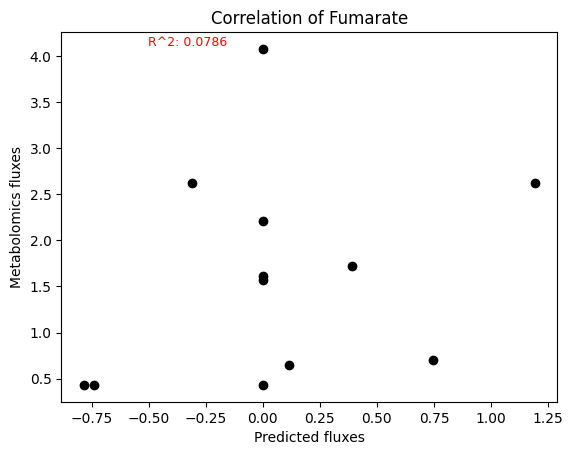

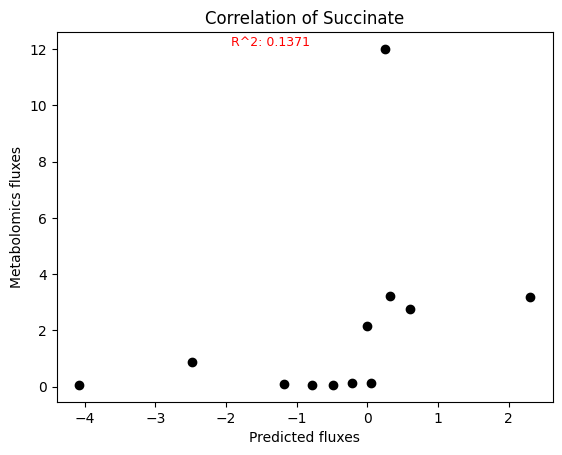

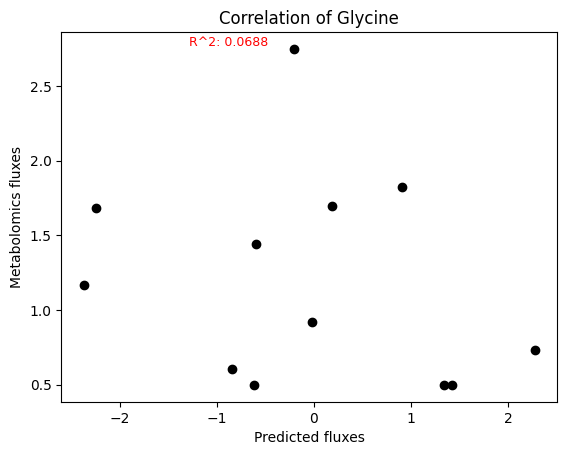

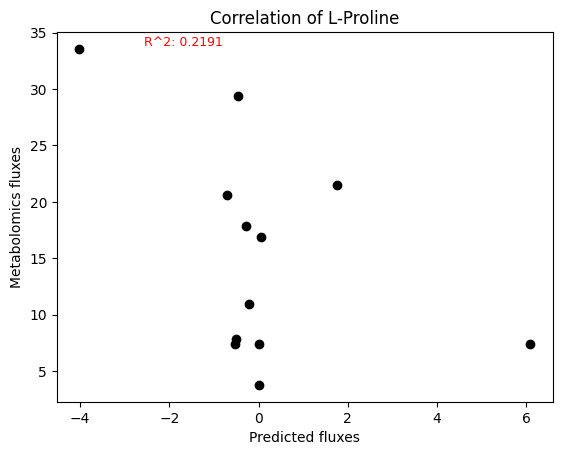

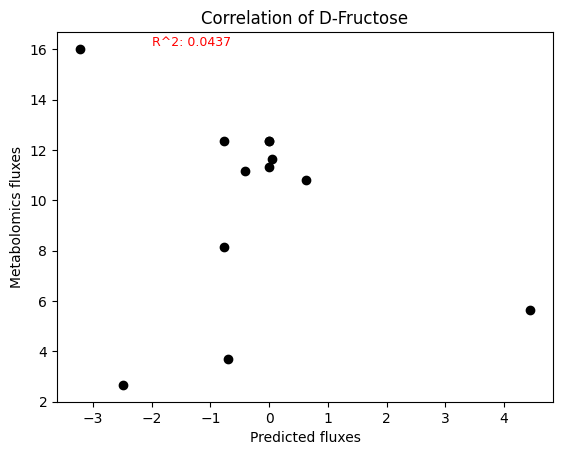

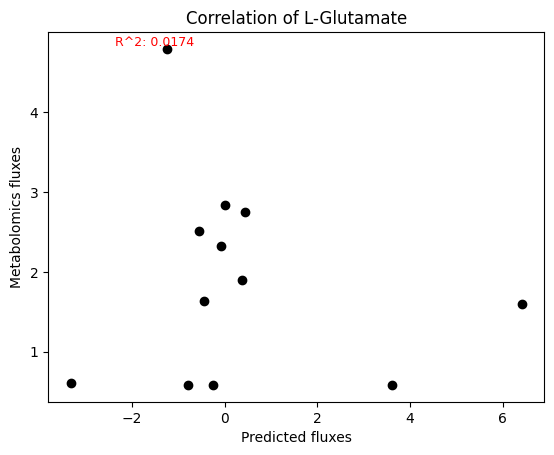

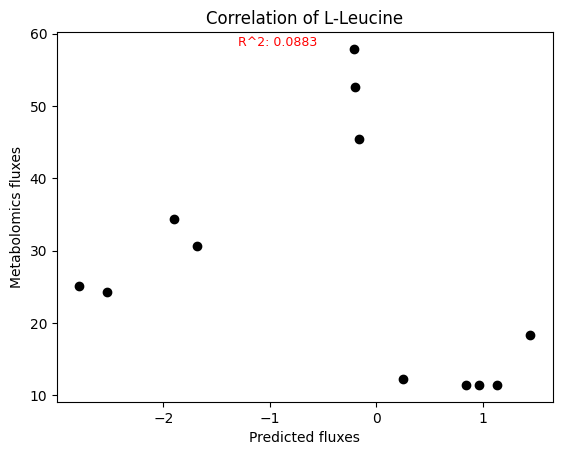

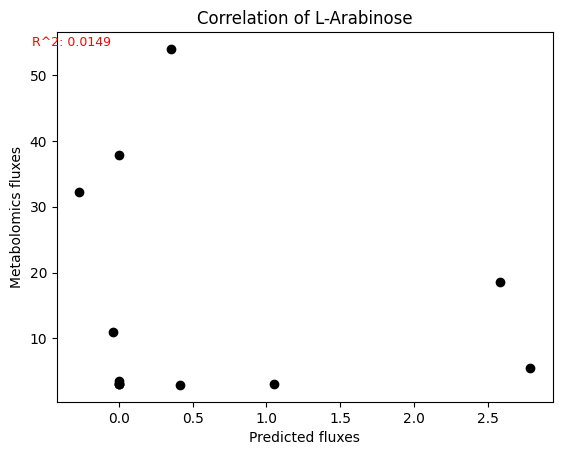

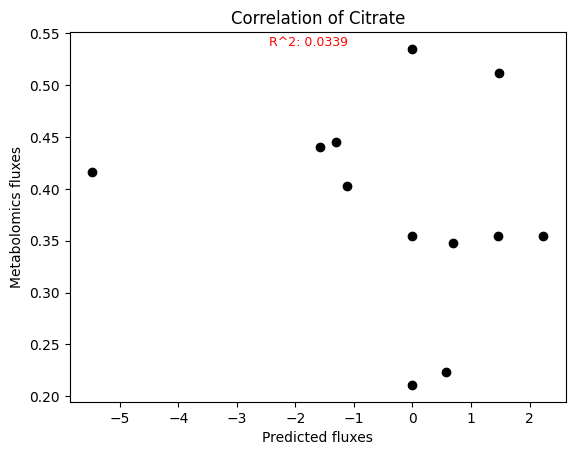

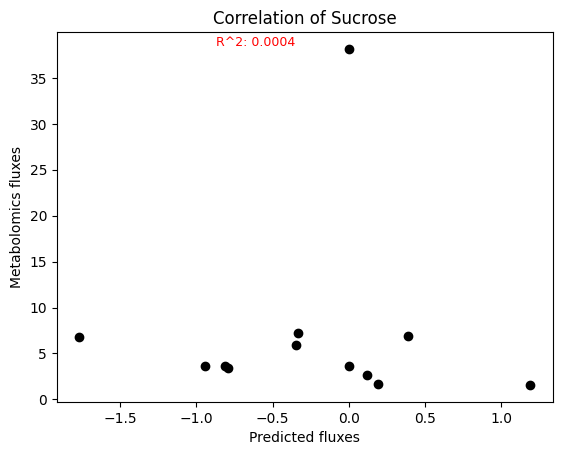

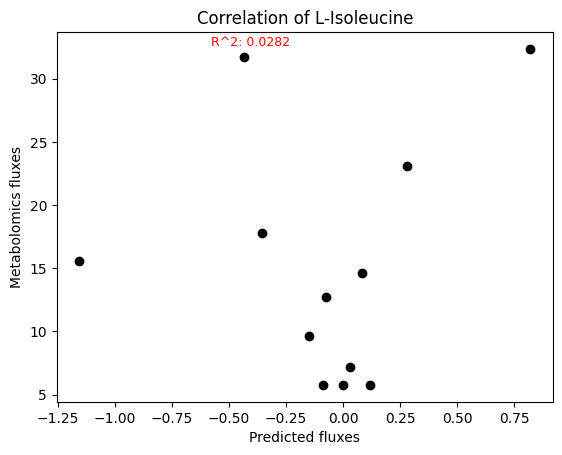

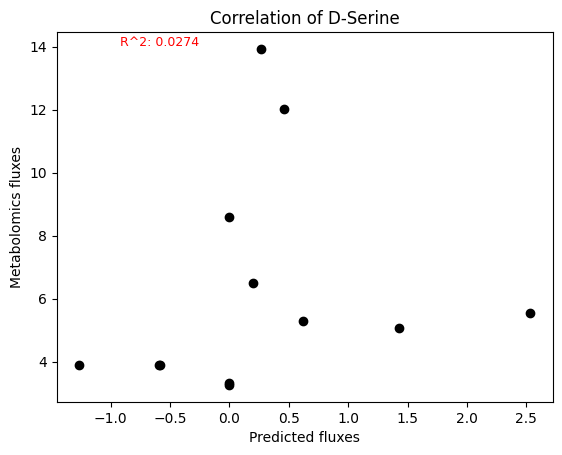

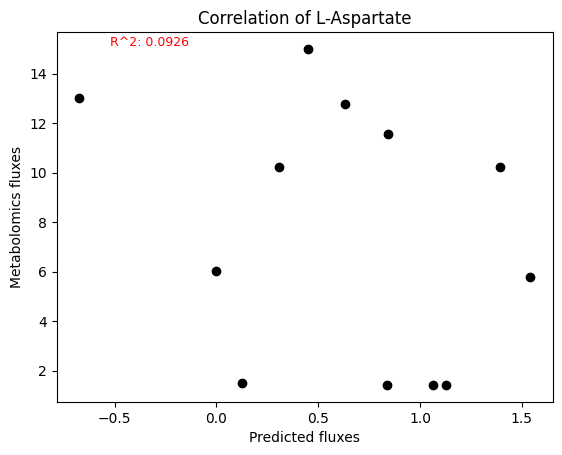

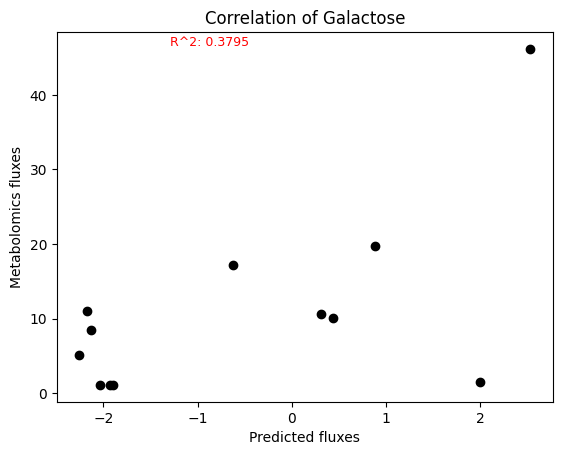

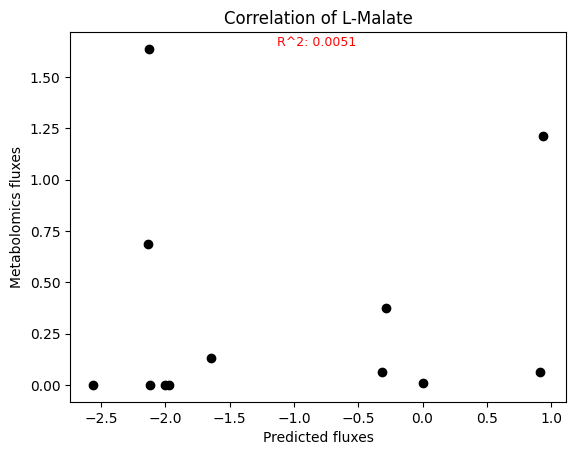

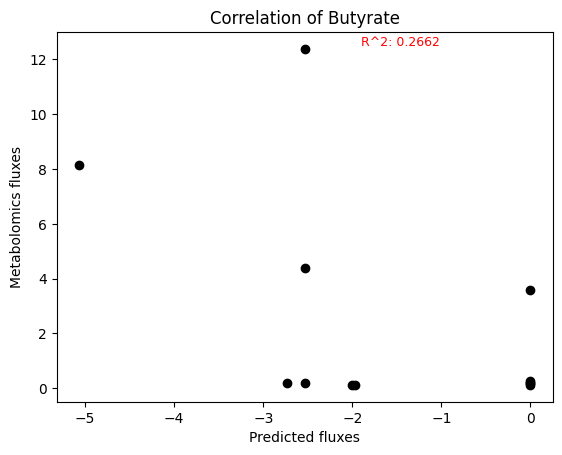

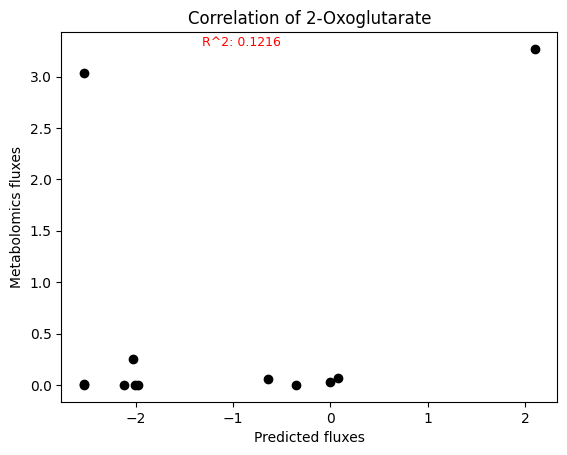

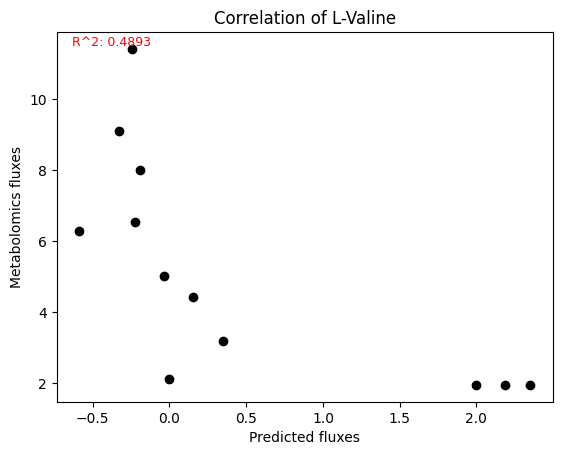

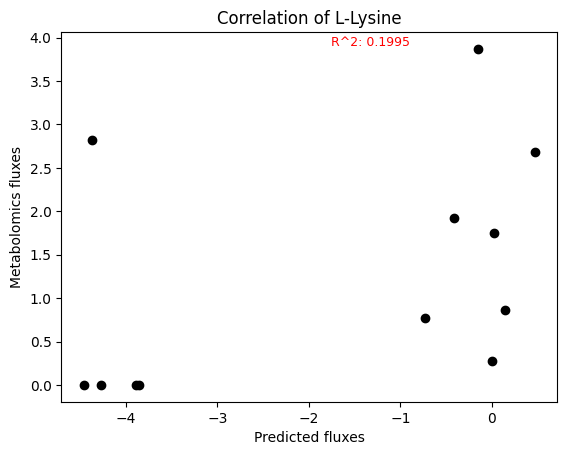

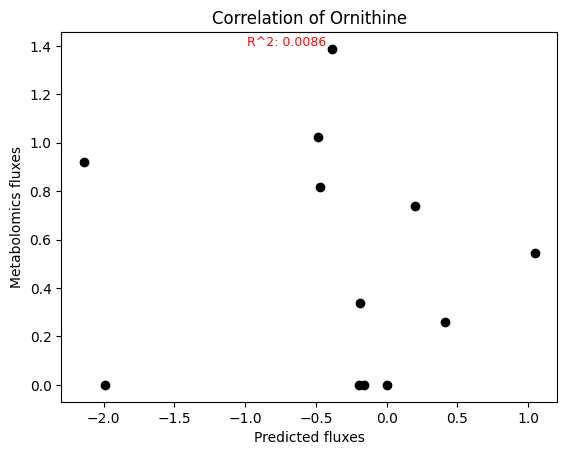

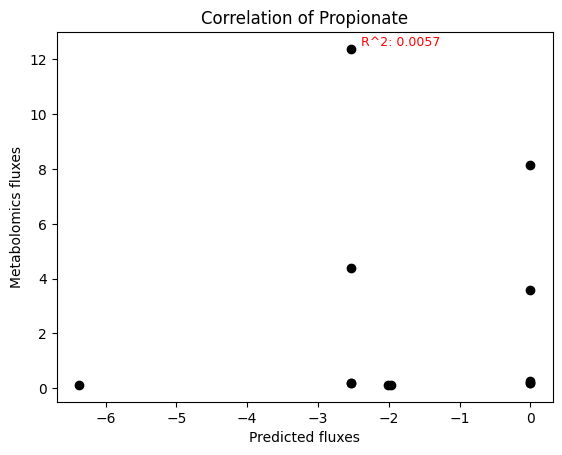

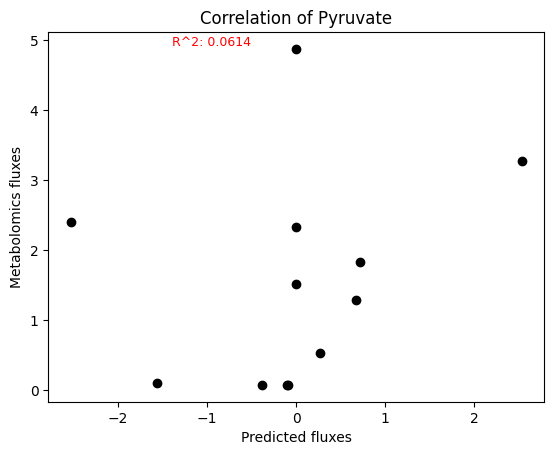

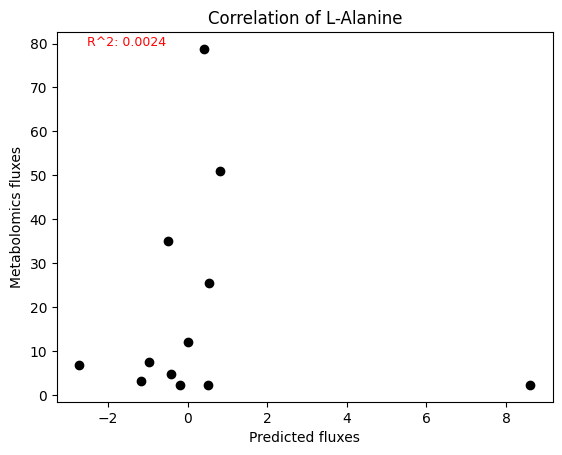

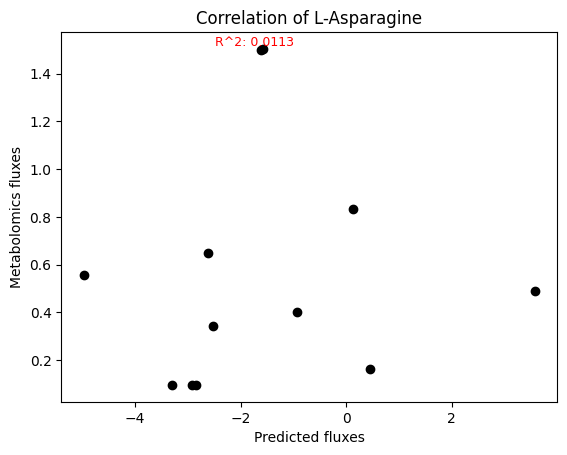

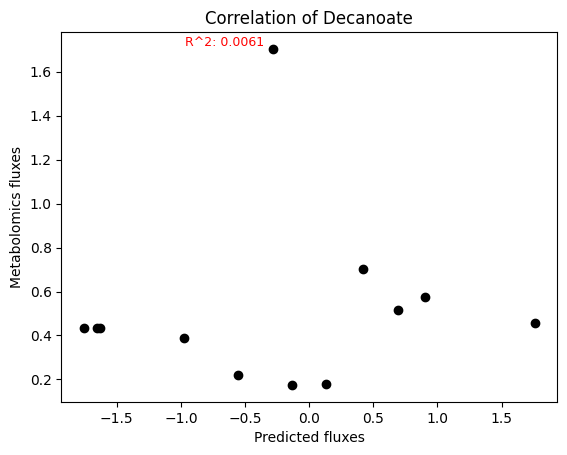

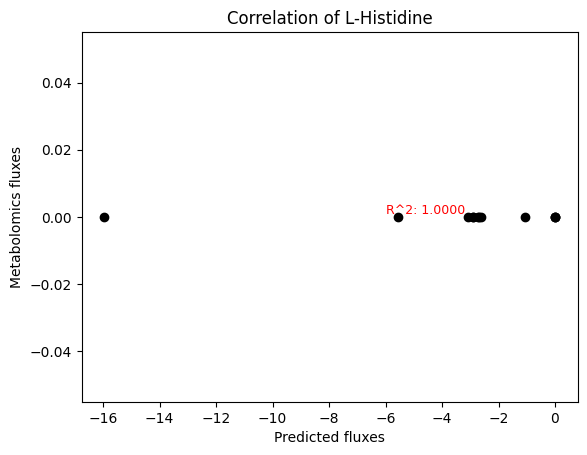

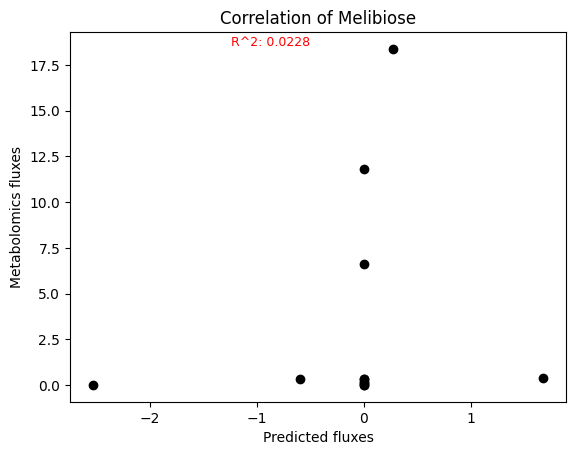

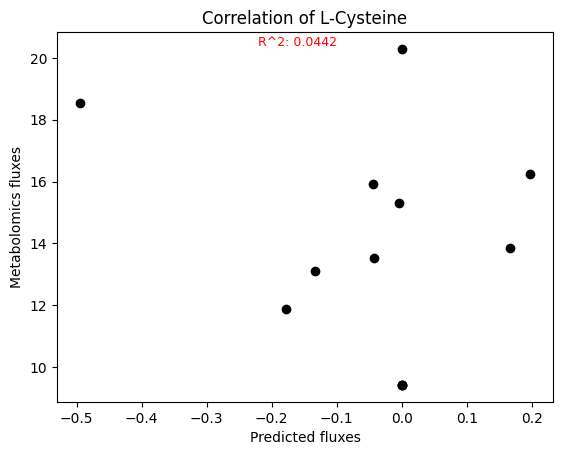

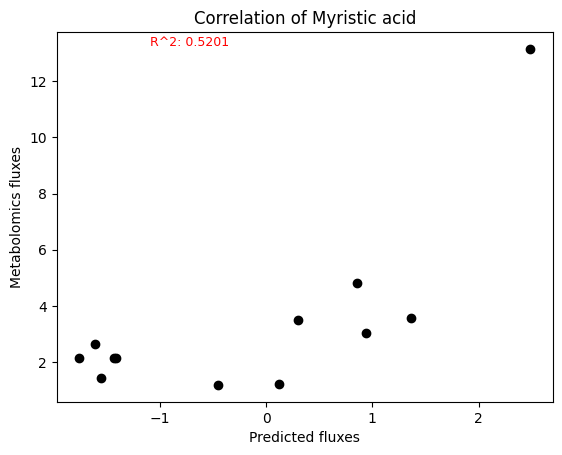

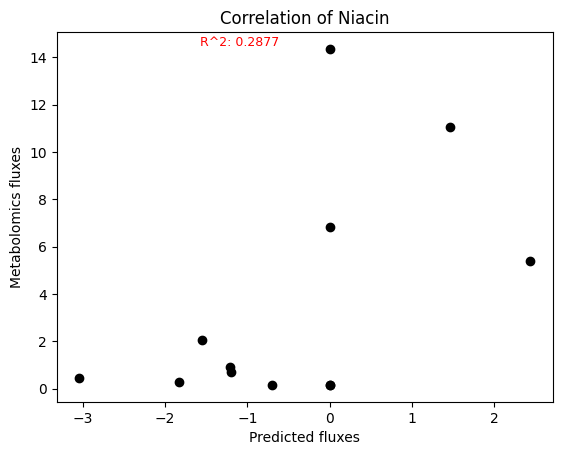

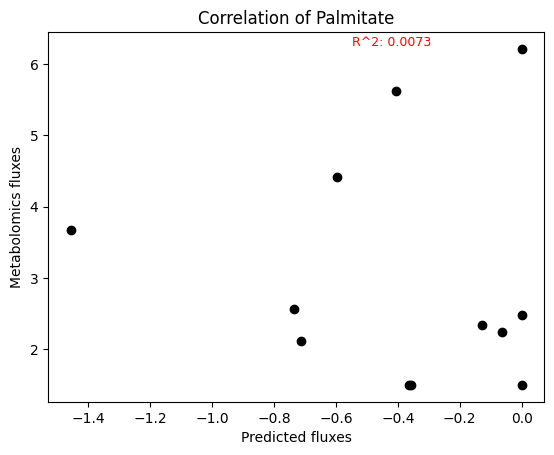

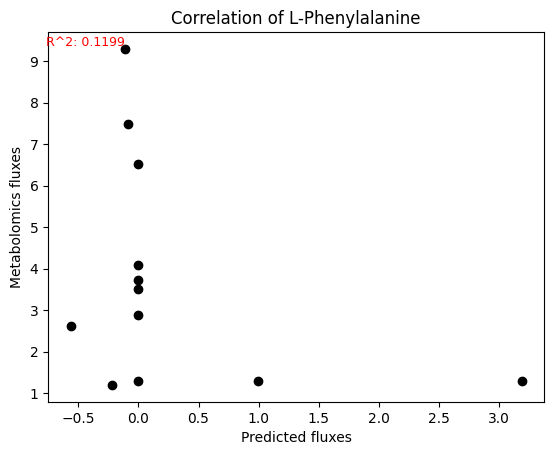

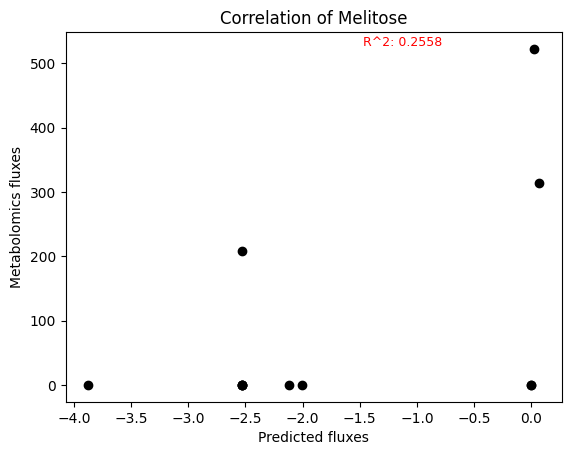

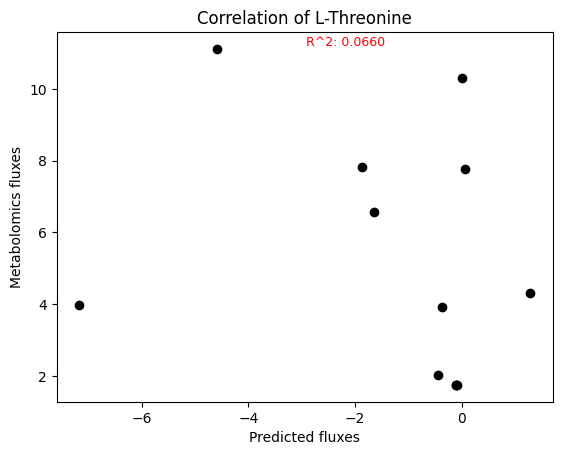

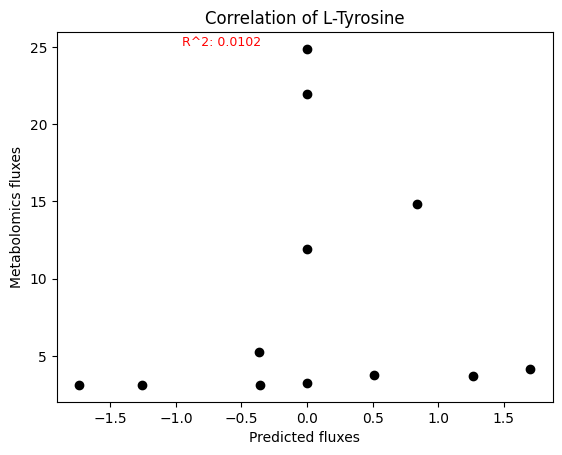

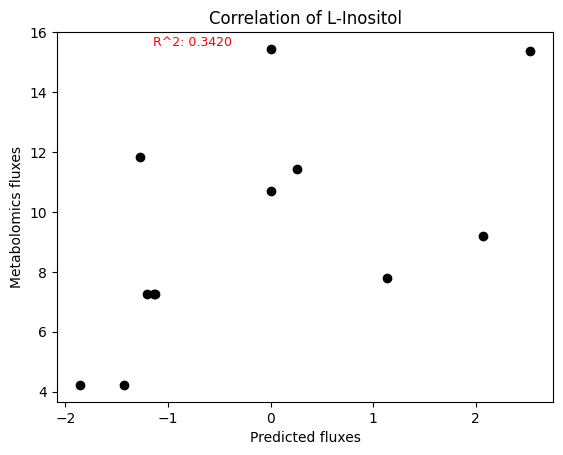

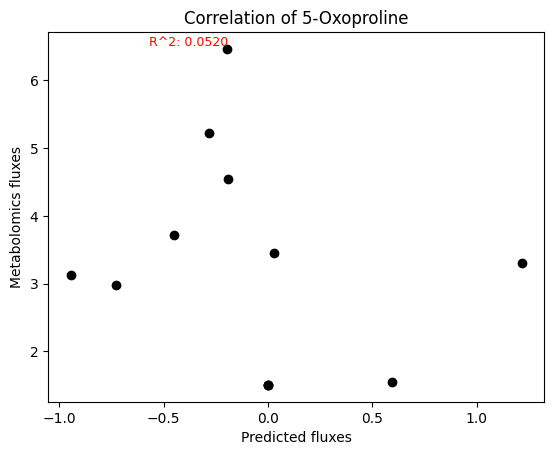

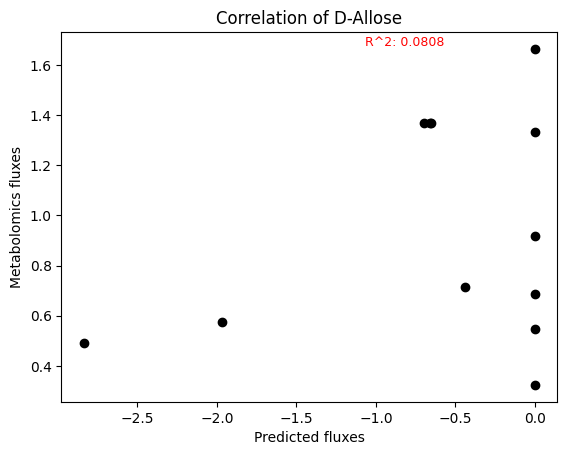

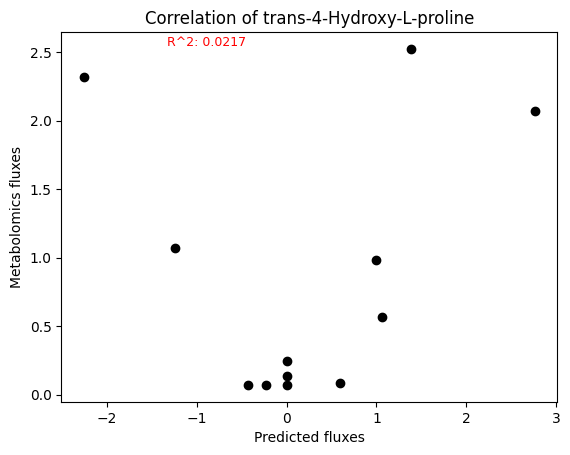

In [26]:
# Initialize the model with no intercept
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from numpy import array

for compound, content in values.items():
    if compound not in fluxesMetabolomics_mapping:   print(f"The {compound} has not been mapped, and is skipped")  ;  continue

    # Create the scatter plot
    xs, ys = array(list(content.values())).reshape(-1, 1), array(list(measured[fluxesMetabolomics_mapping[compound]].values()))
    model = LinearRegression()
    model.fit(xs, ys)

    # plot the correlation
    pyplot.figure()
    pyplot.scatter(xs, ys, color='black', label='Data Points')

    # Add labels and title
    pyplot.xlabel('Predicted fluxes')
    pyplot.ylabel('Metabolomics fluxes')
    pyplot.title(f'Correlation of {compound}')
    
    # add text labels for each point
    # from adjustText import adjust_text
    # texts = [pyplot.text(xs[i], ys[i], label, fontsize=10, ha='center', va='center') for i, label in enumerate(ys)]
    # adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), expand=(2.3, 2.3))
    pyplot.text(min(xs)*.2, max(ys), f"R^2: {model.score(xs, ys):.4f}", fontsize=9, ha='right', va='bottom', color='red')
    
    pyplot.savefig(f"correlationFigs/{compound}_fluxMetabolomics_correlation.png")

# processing the MAG-ASV matching

In [ ]:
from pandas import read_csv

MAGasv = read_csv()